In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

### Read in & filter metadata

In [2]:
df = pd.read_csv('../metadata/metadata_cleaned_wes.csv')

In [3]:
# subsample to individuals (1) with birthplace in UK data (2) meeting QC and (3) within 1eps PCA
df_geo = df[(df['birth_east_coord'].notna()) & (df['birth_UKelsewhere']!='Elsewhere') & (df['used_in_pca']==1) & (df['within_1epsilon_pca']==True)]

In [4]:
df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_5epsilon_pca,within_10epsilon_pca,within_50epsilon_pca,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,True,True,True,False,44777.226354,False,True,True,True
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,True,True,True,False,64536.811201,False,False,True,True
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,True,True,True,False,93434.469014,False,False,True,True
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,True,True,True,True,False,74060.785845,False,False,True,True
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,True,True,True,True,False,47201.694885,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,True,True,True,True,False,245979.673957,False,False,False,True
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,True,True,True,False,54451.813560,False,False,True,True
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,True,True,True,False,132015.150646,False,False,False,True
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,True,True,True,False,163085.866954,False,False,False,True


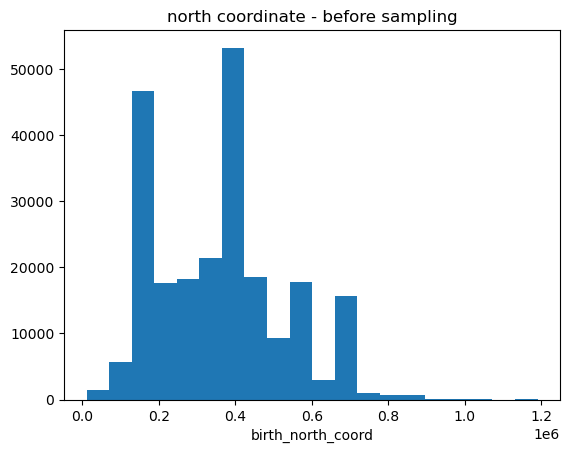

In [11]:
plt.hist(df_geo['birth_north_coord'],bins=20)
plt.title('north coordinate - before sampling')
plt.xlabel('birth_north_coord')
plt.show()

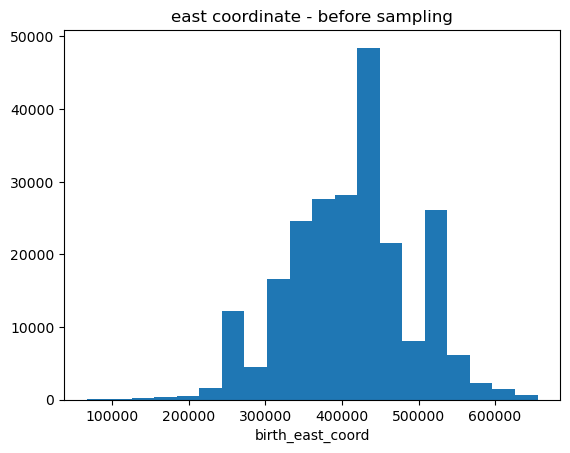

In [10]:
plt.hist(df_geo['birth_east_coord'],bins=20)
plt.xlabel('birth_east_coord')
plt.title('east coordinate - before sampling')
plt.show()

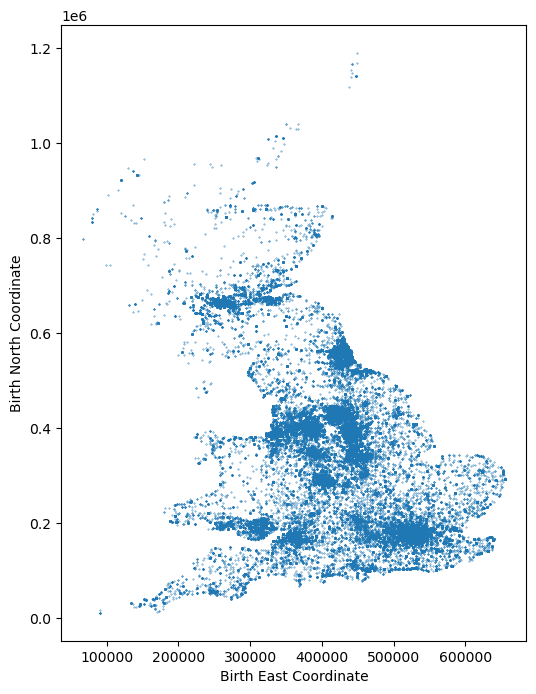

In [17]:
plt.figure(figsize=(6,8))
plt.scatter(df_geo['birth_east_coord'],df_geo['birth_north_coord'],s=0.1)
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.show()

### Set up rectangular grid

In [590]:
# df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_5epsilon_pca,within_10epsilon_pca,within_50epsilon_pca,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,True,True,True,False,44777.226354,False,True,True,True
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,True,True,True,False,64536.811201,False,False,True,True
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,True,True,True,False,93434.469014,False,False,True,True
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,True,True,True,True,False,74060.785845,False,False,True,True
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,True,True,True,True,False,47201.694885,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,True,True,True,True,False,245979.673957,False,False,False,True
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,True,True,True,False,54451.813560,False,False,True,True
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,True,True,True,False,132015.150646,False,False,False,True
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,True,True,True,False,163085.866954,False,False,False,True


In [21]:
# histogram
x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)

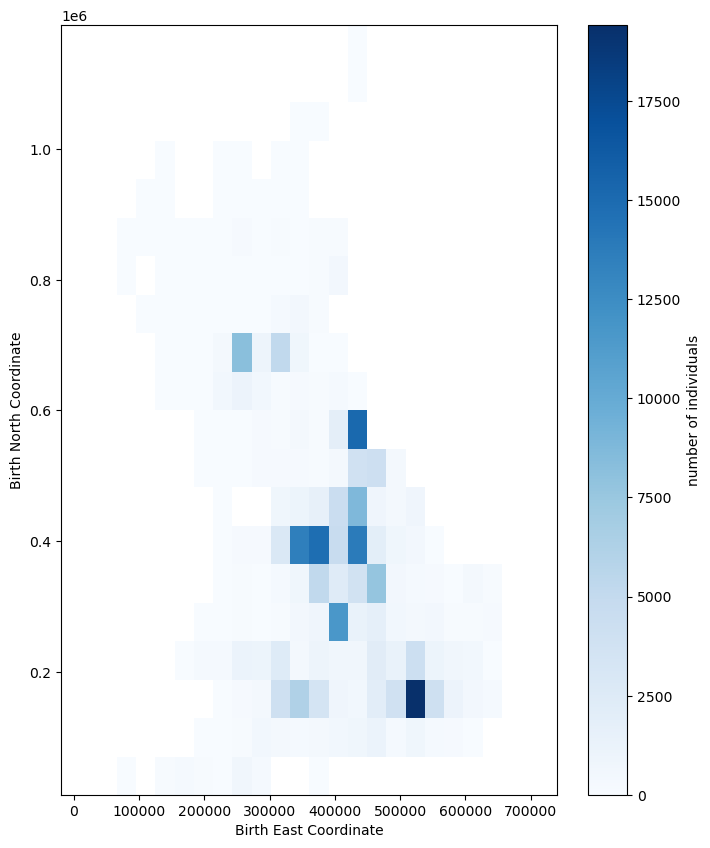

In [22]:
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plt.figure(figsize=(8, 10))
plt.imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
plt.colorbar(label='number of individuals') 
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.show()

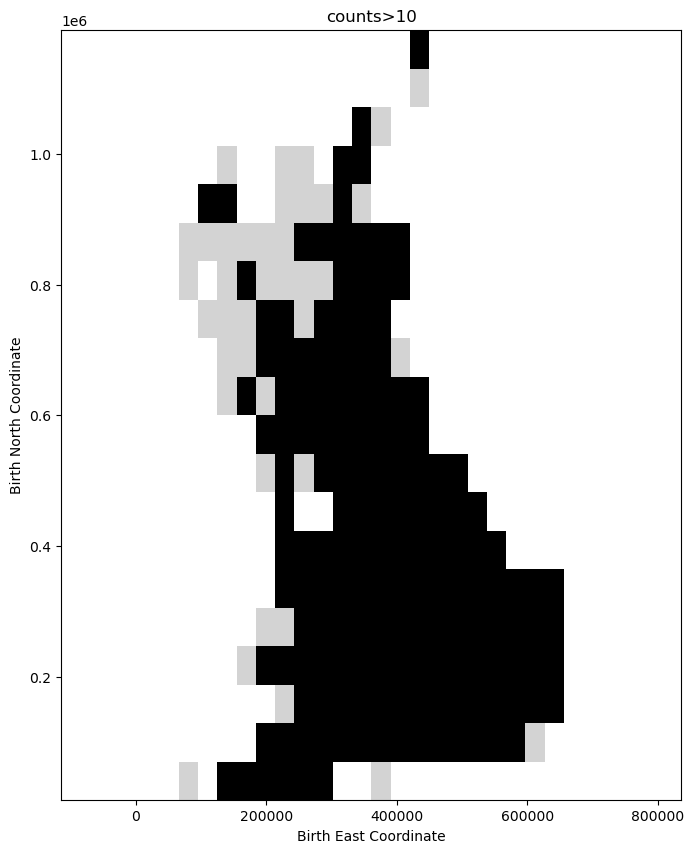

In [36]:
masked_counts = np.where(counts == 0, 0, np.where(counts > 10, 2, 1))
cmap = ListedColormap(['white', 'lightgrey', 'black'])

plt.figure(figsize=(8, 10))
plt.imshow(masked_counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.title('counts>10')
plt.show()

### set center(s) for sampling

In [40]:
# function to map to bin
def map_to_bin(x,y,xedges,yedges):
    return [np.digitize(x,xedges)-1,np.digitize(y,yedges)-1]

# function to get bin center
def get_bin_center(bin_idx,xedges,yedges):
    x_idx, y_idx = bin_idx
    center_x = (xedges[x_idx] + xedges[x_idx + 1]) / 2
    center_y = (yedges[y_idx] + yedges[y_idx + 1]) / 2
    return [center_x, center_y]

In [31]:
# first approach - centroid (median)
med_centroid = df_geo.iloc[:,3:5].median() 
med_centroid

birth_east_coord     418500.0
birth_north_coord    380500.0
dtype: float64

In [38]:
centroid_bin = map_to_bin(med_centroid[0],med_centroid[1],xedges,yedges)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/910601283.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  centroid_bin = map_to_bin(med_centroid[0],med_centroid[1],xedges,yedges)


In [45]:
centroid_bin

[11, 6]

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/99217329.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(med_centroid[0],med_centroid[1],s=30,marker="*",c='black',label='median')


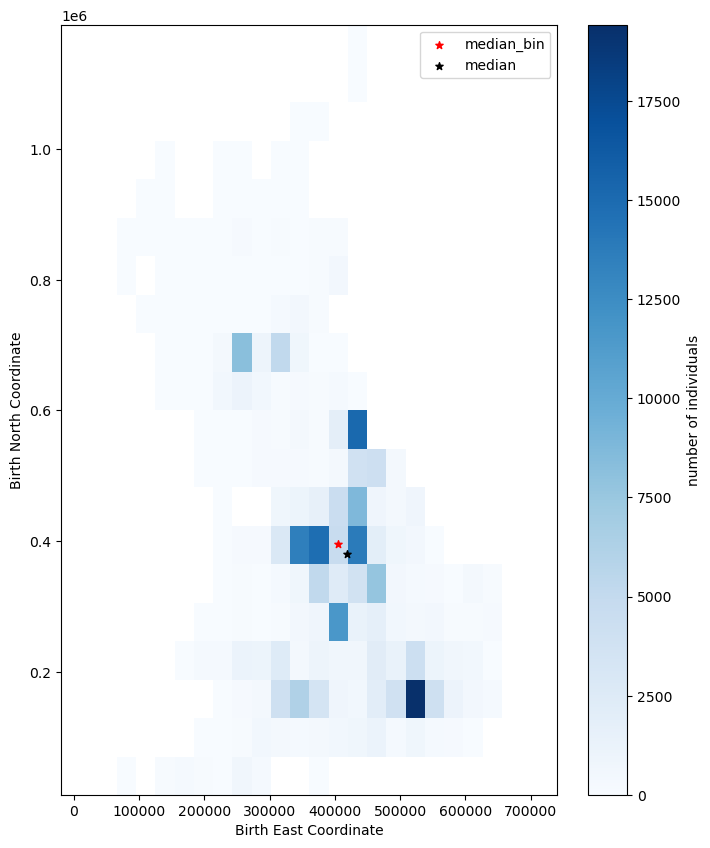

In [44]:
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plt.figure(figsize=(8, 10))
plt.imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
plt.colorbar(label='number of individuals') 

centroid_coord = get_bin_center(centroid_bin,xedges,yedges)
plt.scatter(centroid_coord[0],centroid_coord[1],s=30,marker="*",c='r',label='median_bin')
plt.scatter(med_centroid[0],med_centroid[1],s=30,marker="*",c='black',label='median')
plt.legend()
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.show()

In [46]:
# note that this places centroid into low-density bin but it is near a border - want to shift to the right
# also want to try a center in a more rural/low-density area

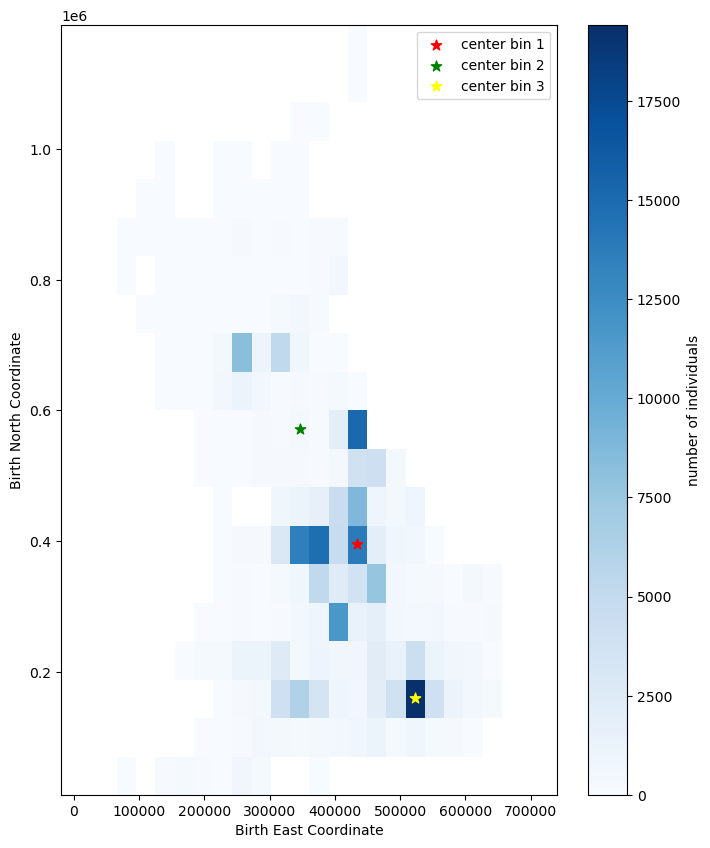

In [142]:
center_bin_1 = [12,6]
center_bin_2 = [9,9]
center_bin_3 = [15,2]
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plt.figure(figsize=(8, 10))
plt.imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.axis('equal')
plt.colorbar(label='number of individuals') 

center_coord_1 = get_bin_center(center_bin_1,xedges,yedges)
center_coord_2 = get_bin_center(center_bin_2,xedges,yedges)
center_coord_3 = get_bin_center(center_bin_3,xedges,yedges)
plt.scatter(center_coord_1[0],center_coord_1[1],s=60,marker="*",c='r',label='center bin 1')
plt.scatter(center_coord_2[0],center_coord_2[1],s=60,marker="*",c='green',label='center bin 2')
plt.scatter(center_coord_3[0],center_coord_3[1],s=60,marker="*",c='yellow',label='center bin 3')
plt.legend()
plt.xlabel('Birth East Coordinate')
plt.ylabel('Birth North Coordinate')
plt.savefig('center_loc.png')
plt.show()

### calculate distances from centers

In [74]:
df_geo['dist_center_1']= np.sqrt(((df_geo.iloc[:,3:5] - center_coord_1) ** 2).sum(axis=1))
df_geo['dist_center_2']= np.sqrt(((df_geo.iloc[:,3:5] - center_coord_2) ** 2).sum(axis=1))
df_geo['dist_center_3']= np.sqrt(((df_geo.iloc[:,3:5] - center_coord_3) ** 2).sum(axis=1))

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/216690330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['dist_center_1']= np.sqrt(((df_geo.iloc[:,3:5] - center_coord_1) ** 2).sum(axis=1))
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/216690330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['dist_center_2']= np.sqrt(((df_geo.iloc[:,3:5] - center_coord_2) ** 2).sum(axis=1))
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/216690330.p

In [61]:
df_geo

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo,dist_center_1,dist_center_2,dist_center_3
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,False,44777.226354,False,True,True,True,24176.357252,239816.526224,252269.927360
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,False,64536.811201,False,False,True,True,70820.168384,170155.711776,305045.433092
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,False,93434.469014,False,False,True,True,110080.635218,309167.780097,171525.409925
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,True,False,74060.785845,False,False,True,True,90815.176320,196511.236956,286896.699615
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,True,False,47201.694885,False,True,True,True,53509.309938,278878.497289,198913.464225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,True,False,245979.673957,False,False,False,True,247756.021622,477295.103945,59081.860583
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,False,54451.813560,False,False,True,True,57498.663028,285507.909260,194347.153954
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,False,132015.150646,False,False,False,True,149005.524226,193026.983217,322731.415034
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,False,163085.866954,False,False,False,True,147156.706439,159968.016335,390589.575194


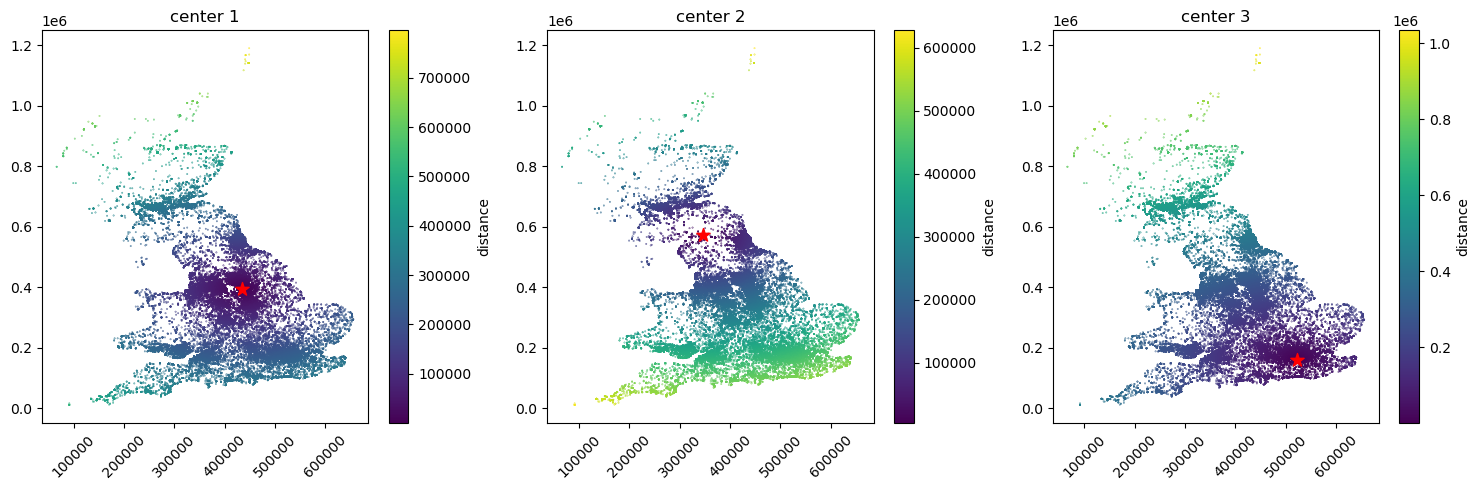

In [143]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].tick_params('x',rotation=45)
ax[1].tick_params('x',rotation=45)
ax[2].tick_params('x',rotation=45)
p1 = ax[0].scatter(df_geo['birth_east_coord'],df_geo['birth_north_coord'],s=0.1,c=df_geo['dist_center_1'])
plt.colorbar(p1,ax=ax[0],label='distance')
ax[0].set_title('center 1')
ax[0].scatter(center_coord_1[0],center_coord_1[1],s=100,marker="*",c='r',label='center bin 1')

p2 = ax[1].scatter(df_geo['birth_east_coord'],df_geo['birth_north_coord'],s=0.1,c=df_geo['dist_center_2'])
plt.colorbar(p2,ax=ax[1],label='distance')
ax[1].set_title('center 2')
ax[1].scatter(center_coord_2[0],center_coord_2[1],s=100,marker="*",c='r',label='center bin 2')

p3 = ax[2].scatter(df_geo['birth_east_coord'],df_geo['birth_north_coord'],s=0.1,c=df_geo['dist_center_3'])
plt.colorbar(p3,ax=ax[2],label='distance')
ax[2].set_title('center 3')
ax[2].scatter(center_coord_3[0],center_coord_3[1],s=100,marker="*",c='r',label='center bin 3')
plt.tight_layout()
plt.savefig('distances.png')
plt.show()

### Implement SIR sampling with these centers and bins

In [89]:
# function to get counts for bin corresponding to a particular coordinate
def get_count(x,y,counts,xedges,yedges):
    x_bin_index = np.digitize(x, xedges) - 1  
    y_bin_index = np.digitize(y, yedges) - 1
    
    x_bin_index = np.clip(x_bin_index, 0, counts.shape[0] - 1)
    y_bin_index = np.clip(y_bin_index, 0, counts.shape[1] - 1)
    
    return counts[x_bin_index, y_bin_index]

In [91]:
df_geo['binned_counts'] = df.apply(lambda row: get_count(row['birth_east_coord'],row['birth_north_coord'],counts,xedges,yedges),axis=1)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/605446537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['binned_counts'] = df.apply(lambda row: get_count(row['birth_east_coord'],row['birth_north_coord'],counts,xedges,yedges),axis=1)


In [94]:
# filter out bins with less than 15
thresh=15
df_geo_filt = df_geo[df_geo['binned_counts']>thresh]

N=len(df_geo_filt)
n=10000

In [95]:
df_geo_filt

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo,dist_center_1,dist_center_2,dist_center_3,binned_counts
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,False,44777.226354,False,True,True,True,24176.357252,202337.468725,252269.927360,1911.0
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,False,64536.811201,False,False,True,True,70820.168384,150823.908085,305045.433092,14791.0
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,False,93434.469014,False,False,True,True,110080.635218,290976.977182,171525.409925,11632.0
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,False,74060.785845,False,False,True,True,90815.176320,188033.378021,286896.699615,13493.0
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,False,47201.694885,False,True,True,True,53509.309938,249995.002450,198913.464225,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,False,245979.673957,False,False,False,True,247756.021622,444493.308442,59081.860583,662.0
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,False,54451.813560,False,False,True,True,57498.663028,255070.678930,194347.153954,7685.0
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,False,132015.150646,False,False,False,True,149005.524226,202068.555817,322731.415034,204.0
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,False,163085.866954,False,False,False,True,147156.706439,102711.495218,390589.575194,3806.0


In [96]:
# binned frequencies and uniform weights
df_geo_filt['freq_binned']=df_geo_filt['binned_counts']/N
df_geo_filt['IS_weights_unif']=1/df_geo_filt['freq_binned']

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/3200051293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_filt['freq_binned']=df_geo_filt['binned_counts']/N
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/3200051293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_filt['IS_weights_unif']=1/df_geo_filt['freq_binned']


In [100]:
# gaussian weights

# function to get Gaussian density from distance
def gaussian_2d(r, sigma):
    return (1 / (2 * np.pi * sigma ** 2)) * np.exp(-r ** 2 / (2 * sigma ** 2))

centers = ['dist_center_1','dist_center_2','dist_center_3']
w_list = [10000,50000,100000]
for c in centers:
    for w in w_list:
        new_col = f'IS_weights_{c}_{w}'
        df_geo_filt[new_col] = df_geo_filt.apply(lambda row: gaussian_2d(row[c],w),axis=1)/df_geo_filt['freq_binned']

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/1394740055.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_filt[new_col] = df_geo_filt.apply(lambda row: gaussian_2d(row[c],w),axis=1)/df_geo_filt['freq_binned']
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_79394/1394740055.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo_filt[new_col] = df_geo_filt.apply(lambda row: gaussian_2d(row[c],w),axis=1)/df_geo_filt['freq_binned']
/var/folders/r0/wf2xsjdx3h366x3_hj

In [101]:
df_geo_filt

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,IS_weights_unif,IS_weights_dist_center_1_10000,IS_weights_dist_center_1_50000,IS_weights_dist_center_1_100000,IS_weights_dist_center_2_10000,IS_weights_dist_center_2_50000,IS_weights_dist_center_2_100000,IS_weights_dist_center_3_10000,IS_weights_dist_center_3_50000,IS_weights_dist_center_3_100000
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,120.800105,1.034356e-08,6.841932e-09,1.867219e-09,2.414499e-96,2.137495e-12,2.482429e-10,1.233476e-145,2.281588e-14,7.979210e-11
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,15.607396,3.192559e-19,3.643931e-10,1.933038e-10,9.972849e-58,1.050406e-11,7.965027e-11,2.156476e-210,8.217777e-18,2.368844e-12
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,19.846028,1.535119e-34,1.119489e-10,1.723297e-10,4.427246e-192,5.590097e-17,4.580998e-12,4.098994e-72,3.516261e-12,7.254802e-11
5,1000799,1.0,1.0,344500.0,383500.0,Liverpool,England,0.000347,-0.000246,0.000481,...,17.108797,3.357733e-26,2.092858e-10,1.802809e-10,4.563143e-85,9.248442e-13,4.648168e-11,5.032245e-187,7.722688e-17,4.443312e-12
6,1000844,1.0,1.0,446500.0,342500.0,Nottingham,England,0.000352,-0.000179,-0.000078,...,63.004640,6.077604e-14,2.262321e-09,8.689966e-10,1.948018e-143,1.495508e-14,4.406326e-11,1.211953e-93,1.467386e-12,1.386806e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469767,6023153,1.0,1.0,573500.0,189500.0,Bury,England,0.000360,-0.000178,-0.000225,...,348.714502,2.835951e-140,1.034395e-13,2.578542e-10,0.000000e+00,1.532020e-25,2.844584e-13,1.460174e-14,1.104472e-08,4.661131e-09
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,30.038907,3.165246e-15,9.871892e-10,4.052409e-10,2.518991e-149,4.270052e-15,1.848083e-11,4.583728e-90,1.001920e-12,7.233049e-11
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,1131.612745,1.104293e-54,8.493381e-10,5.934630e-09,3.895877e-95,2.046357e-11,2.338131e-09,1.215009e-232,6.467559e-17,9.858449e-11
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,60.653967,9.146087e-55,5.079273e-11,3.269226e-10,1.192347e-30,4.681751e-10,5.696349e-10,0.000000e+00,2.165346e-22,4.697603e-13


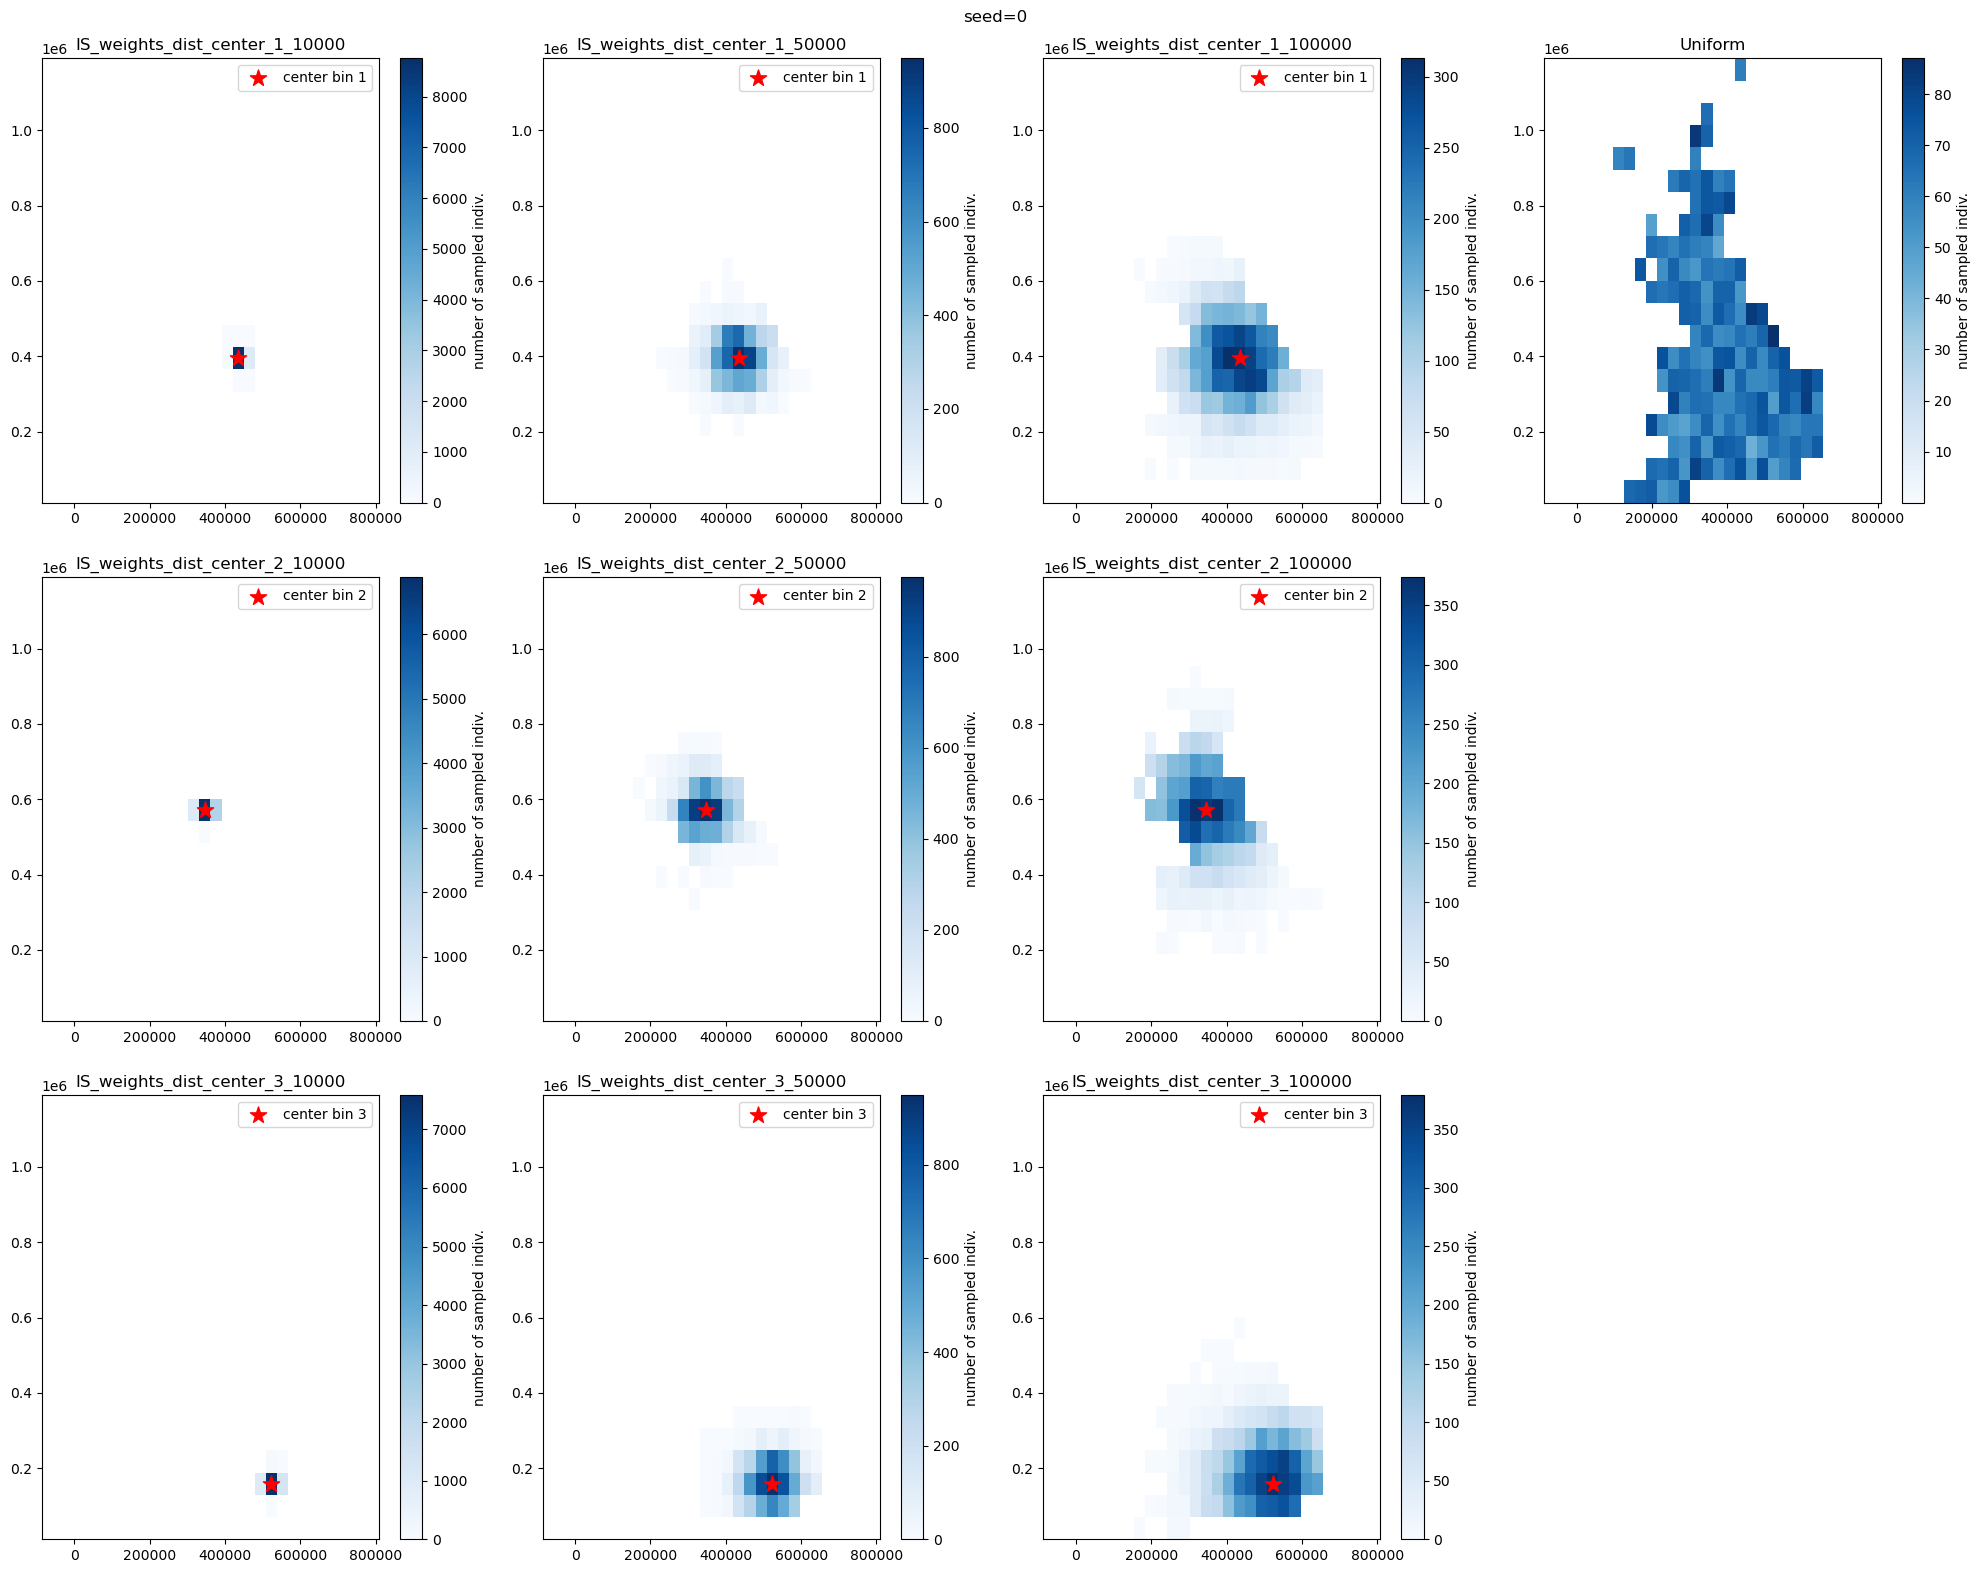

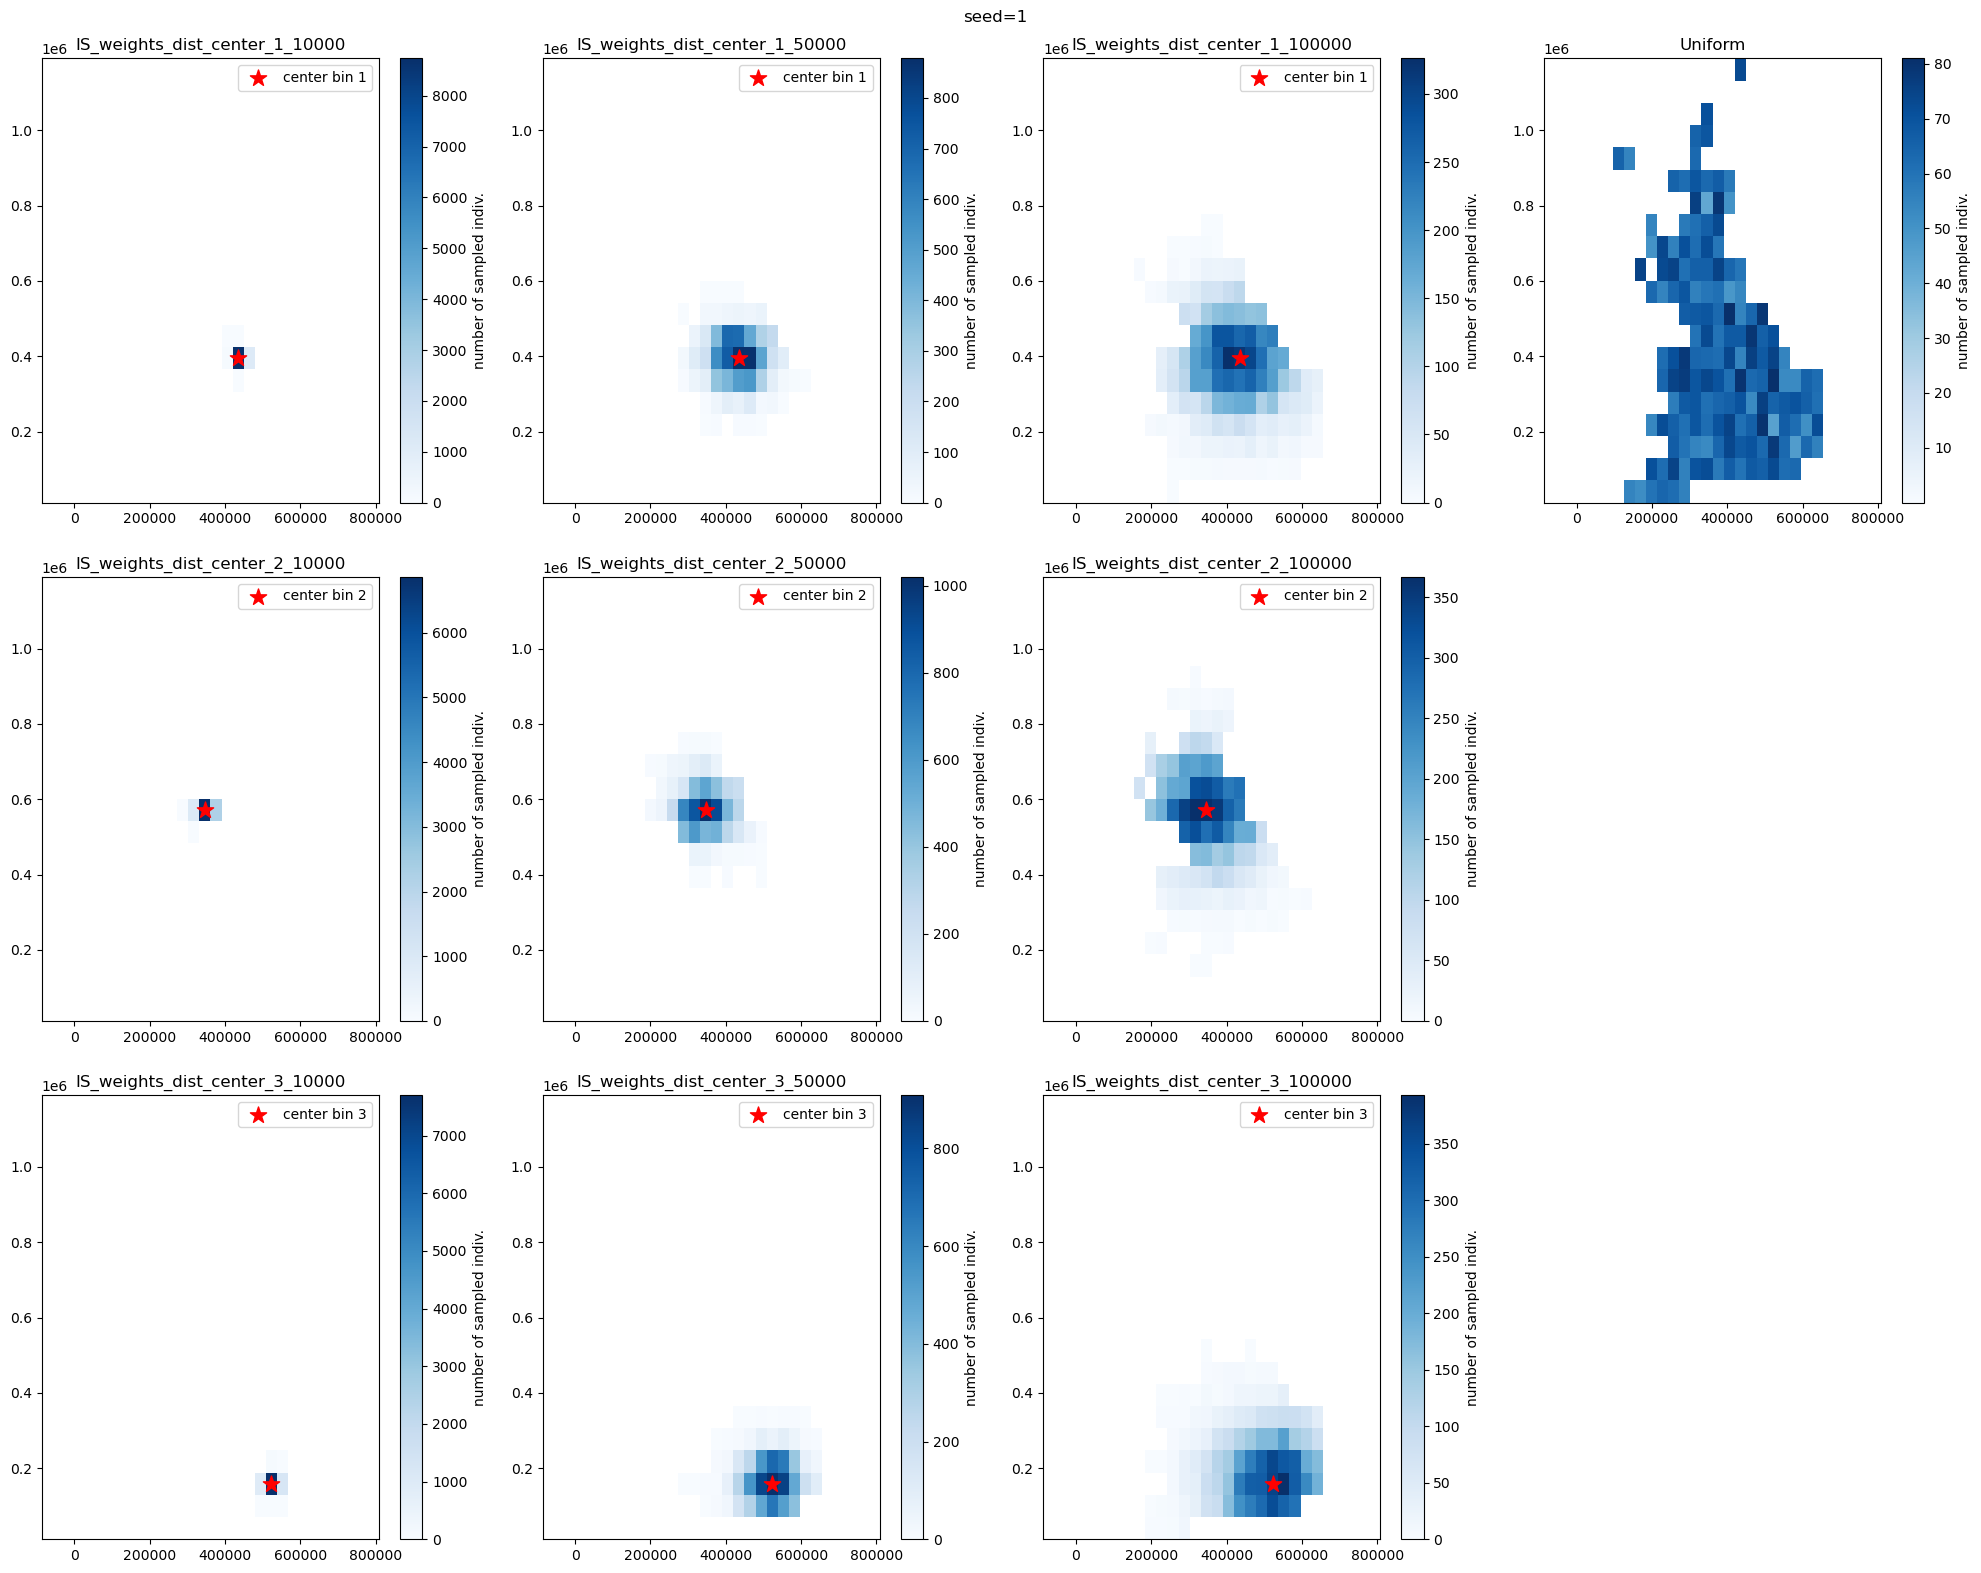

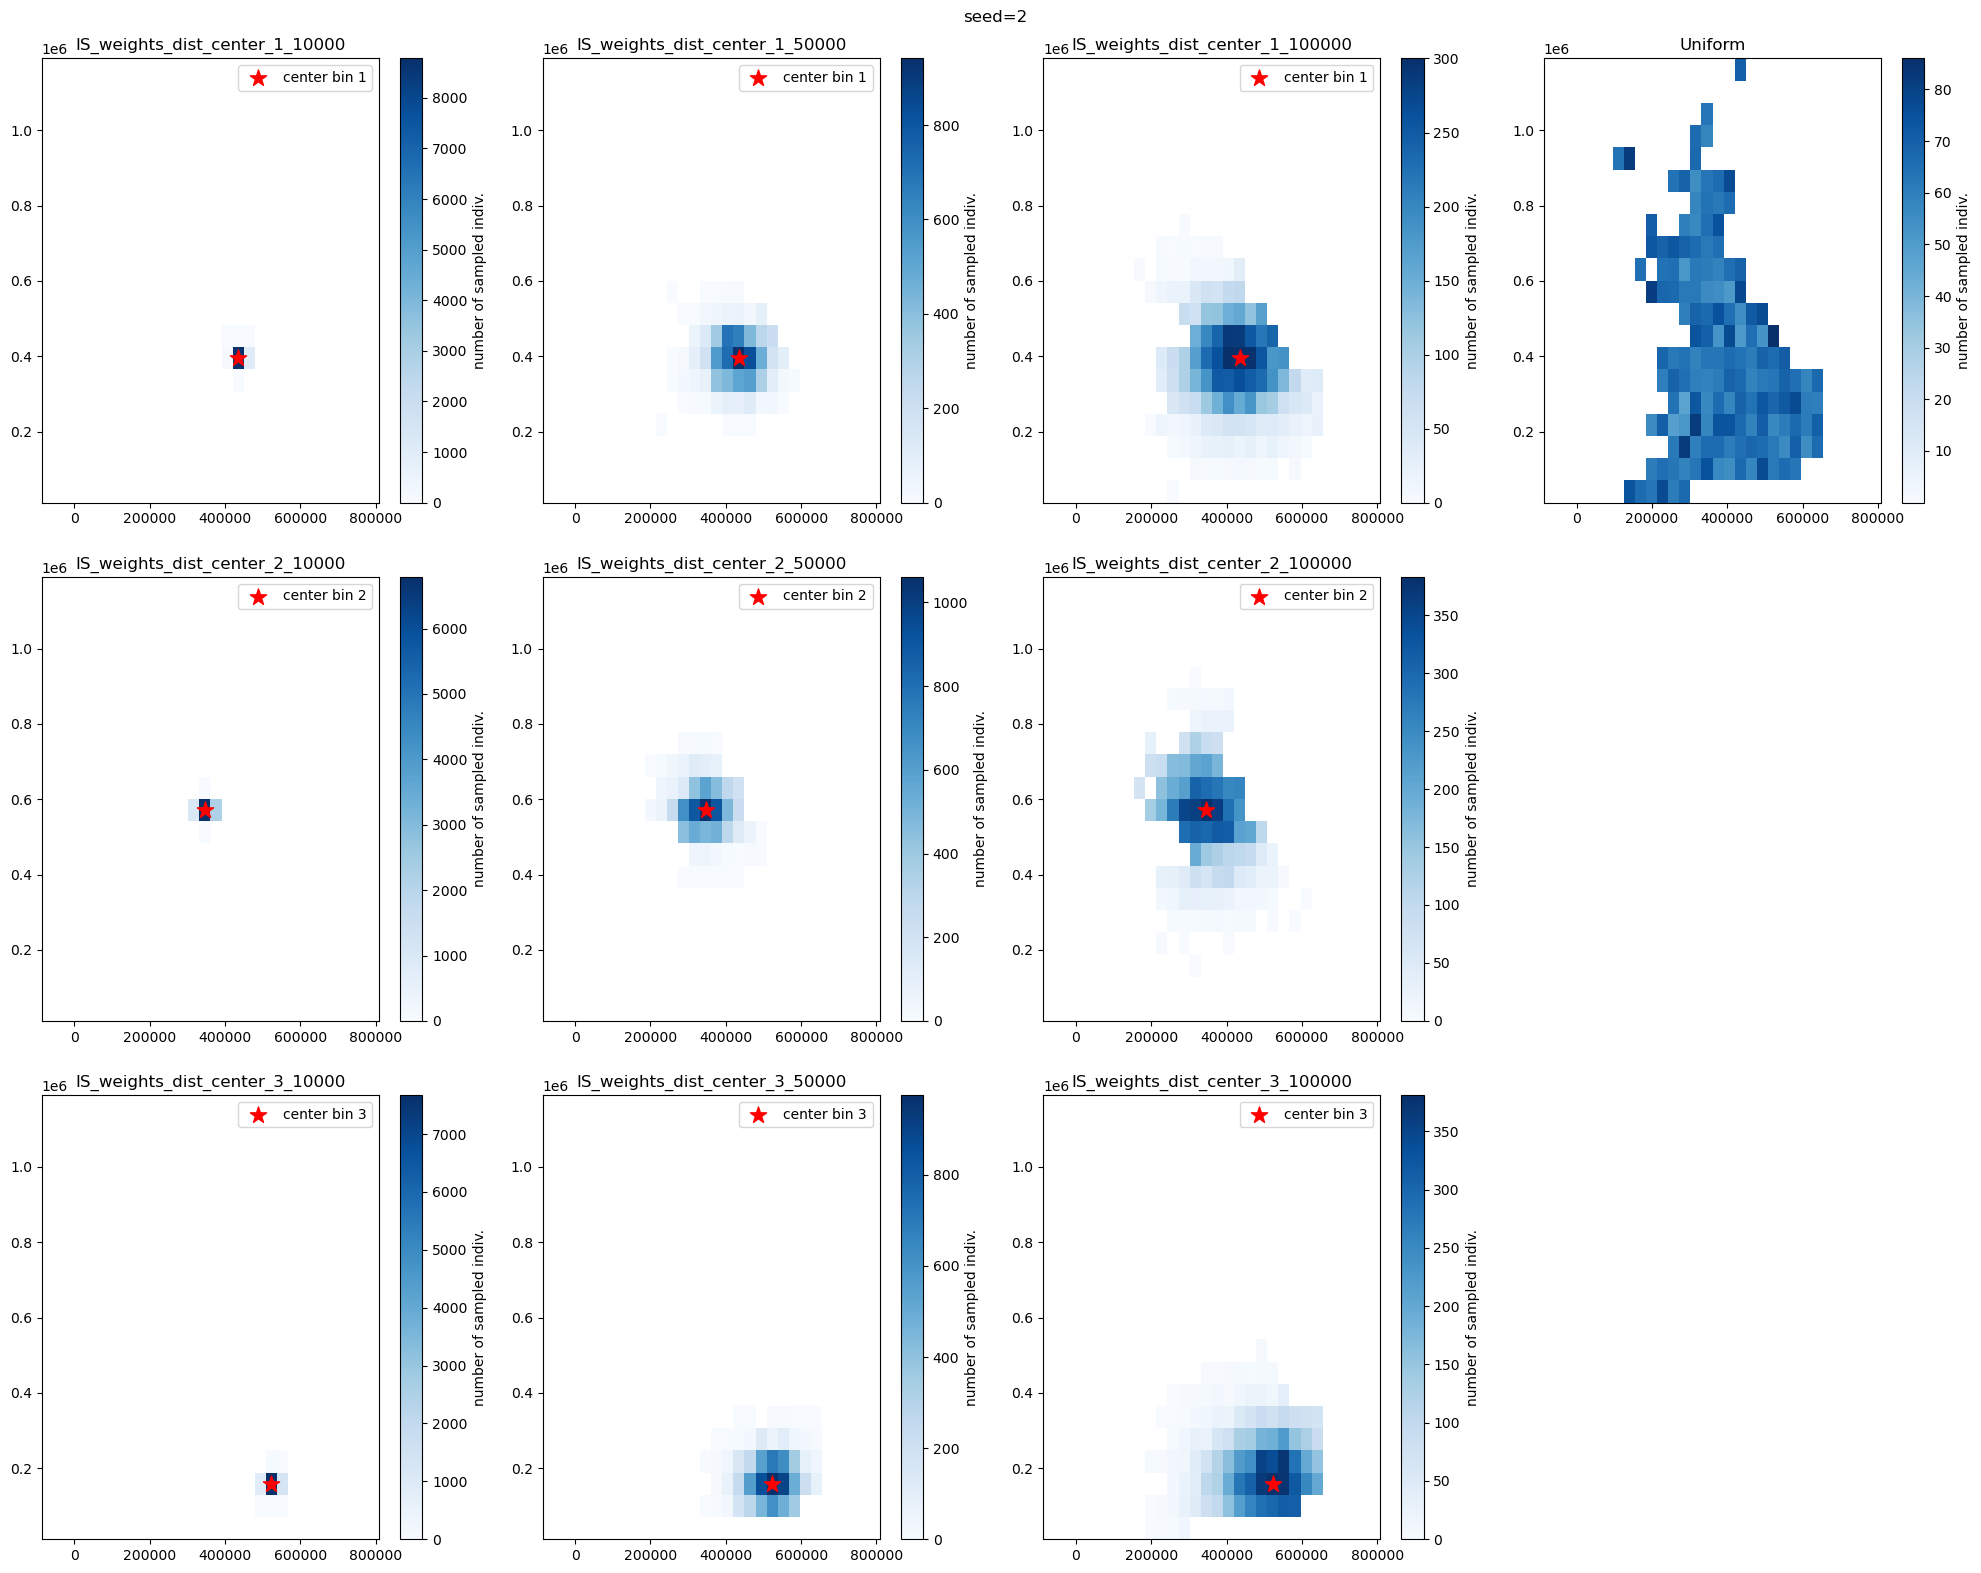

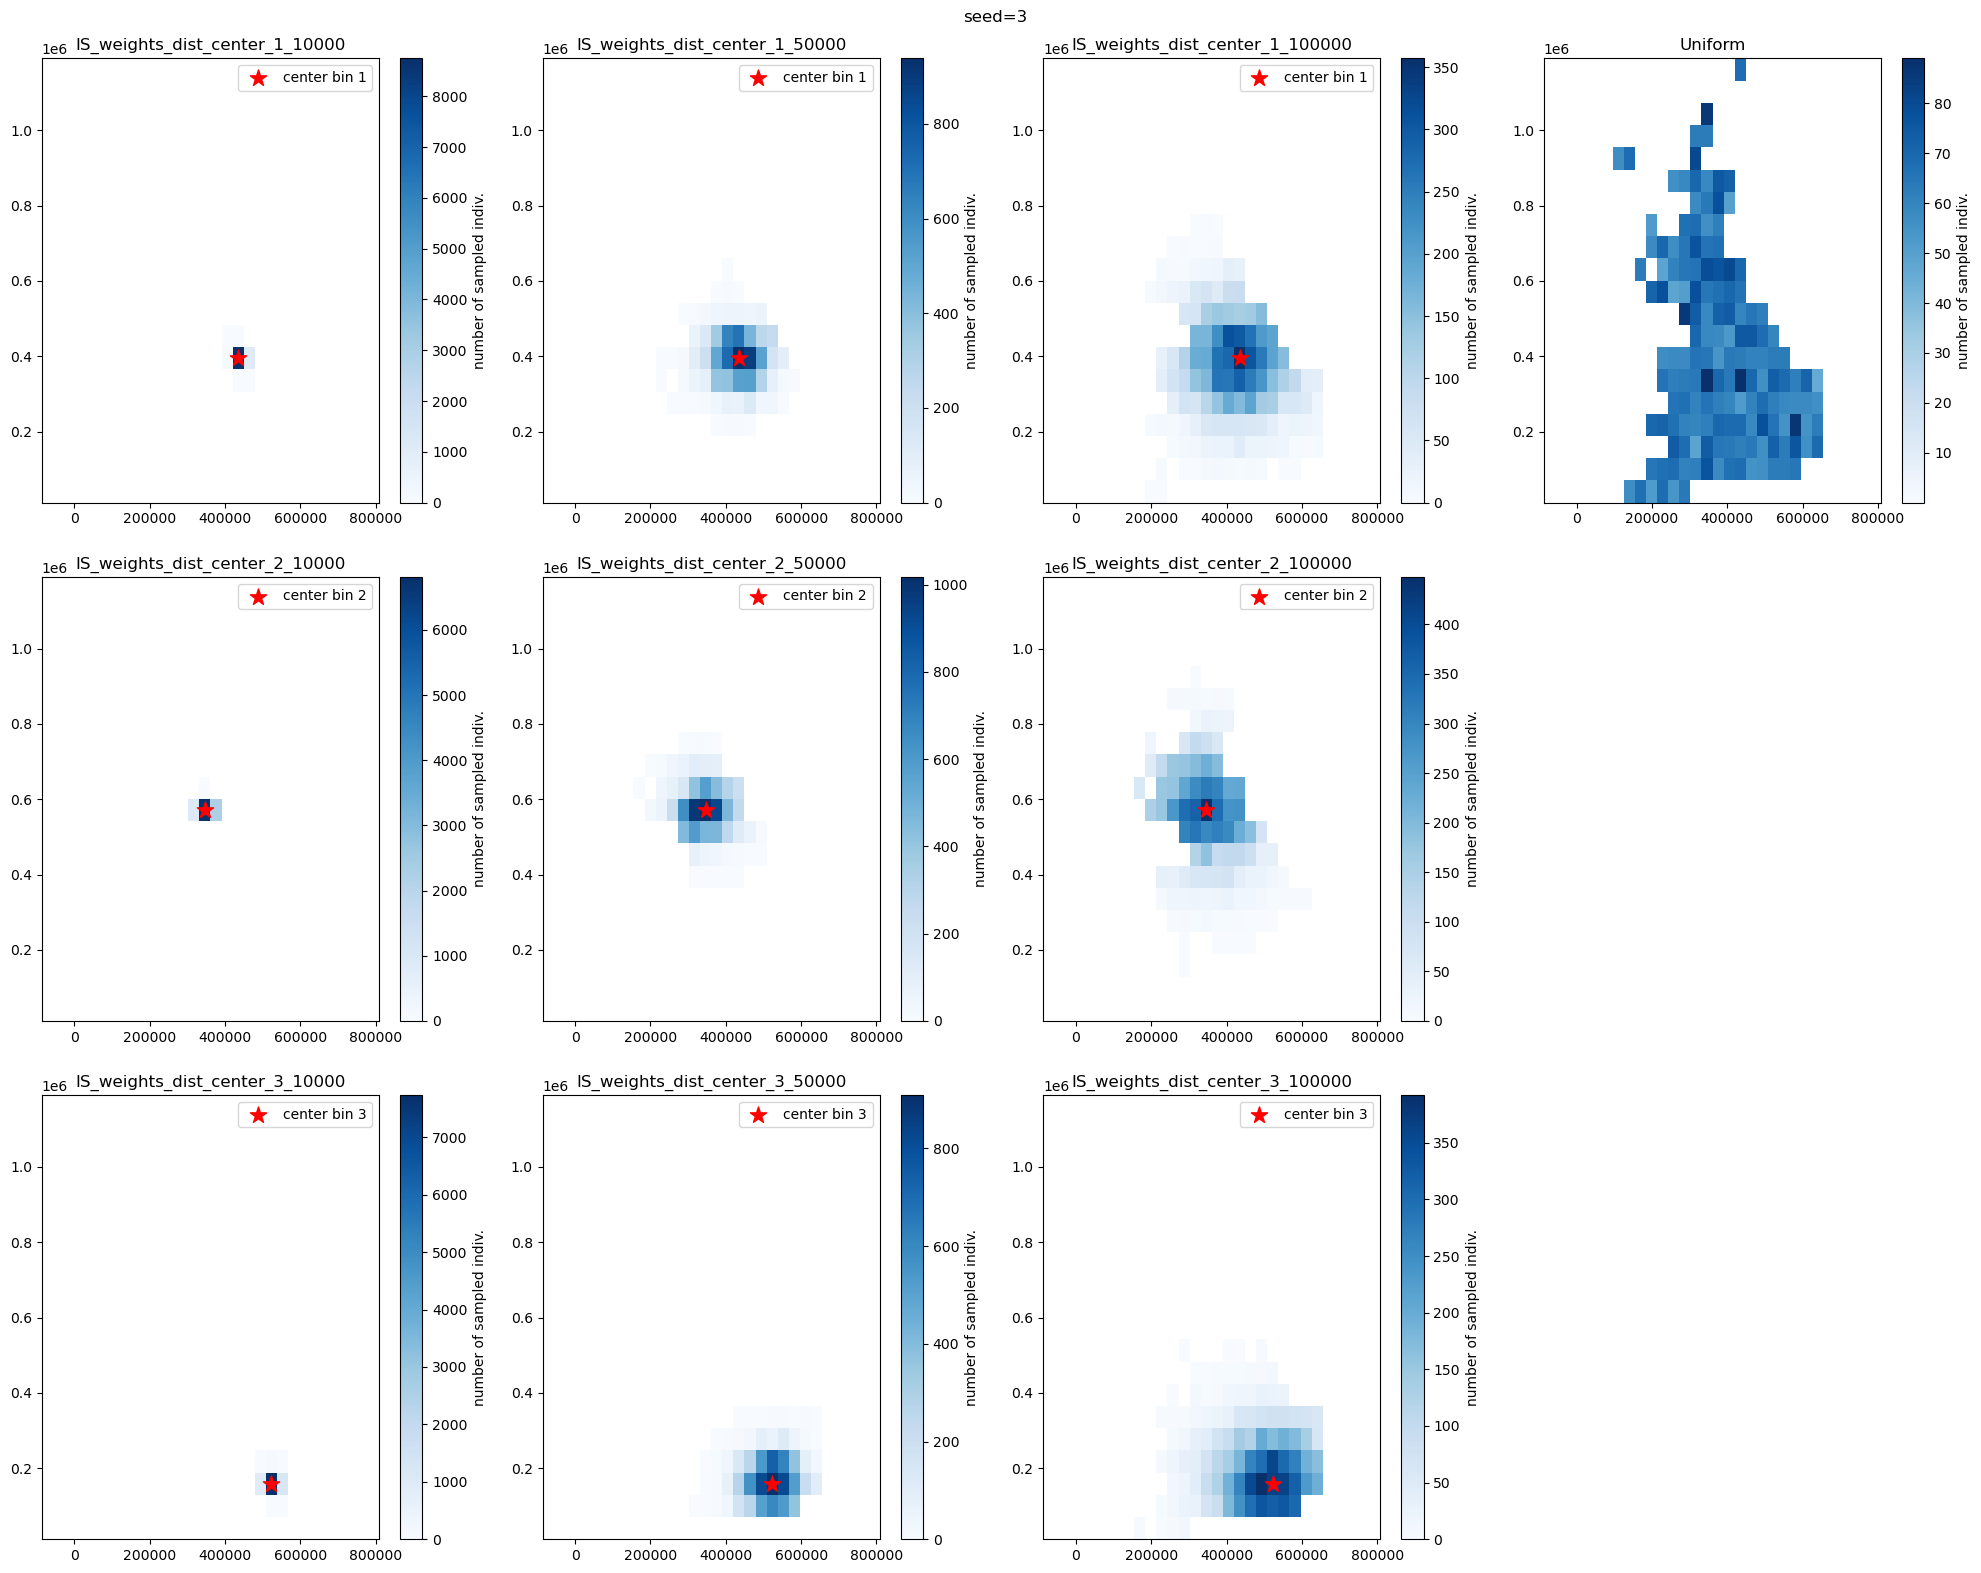

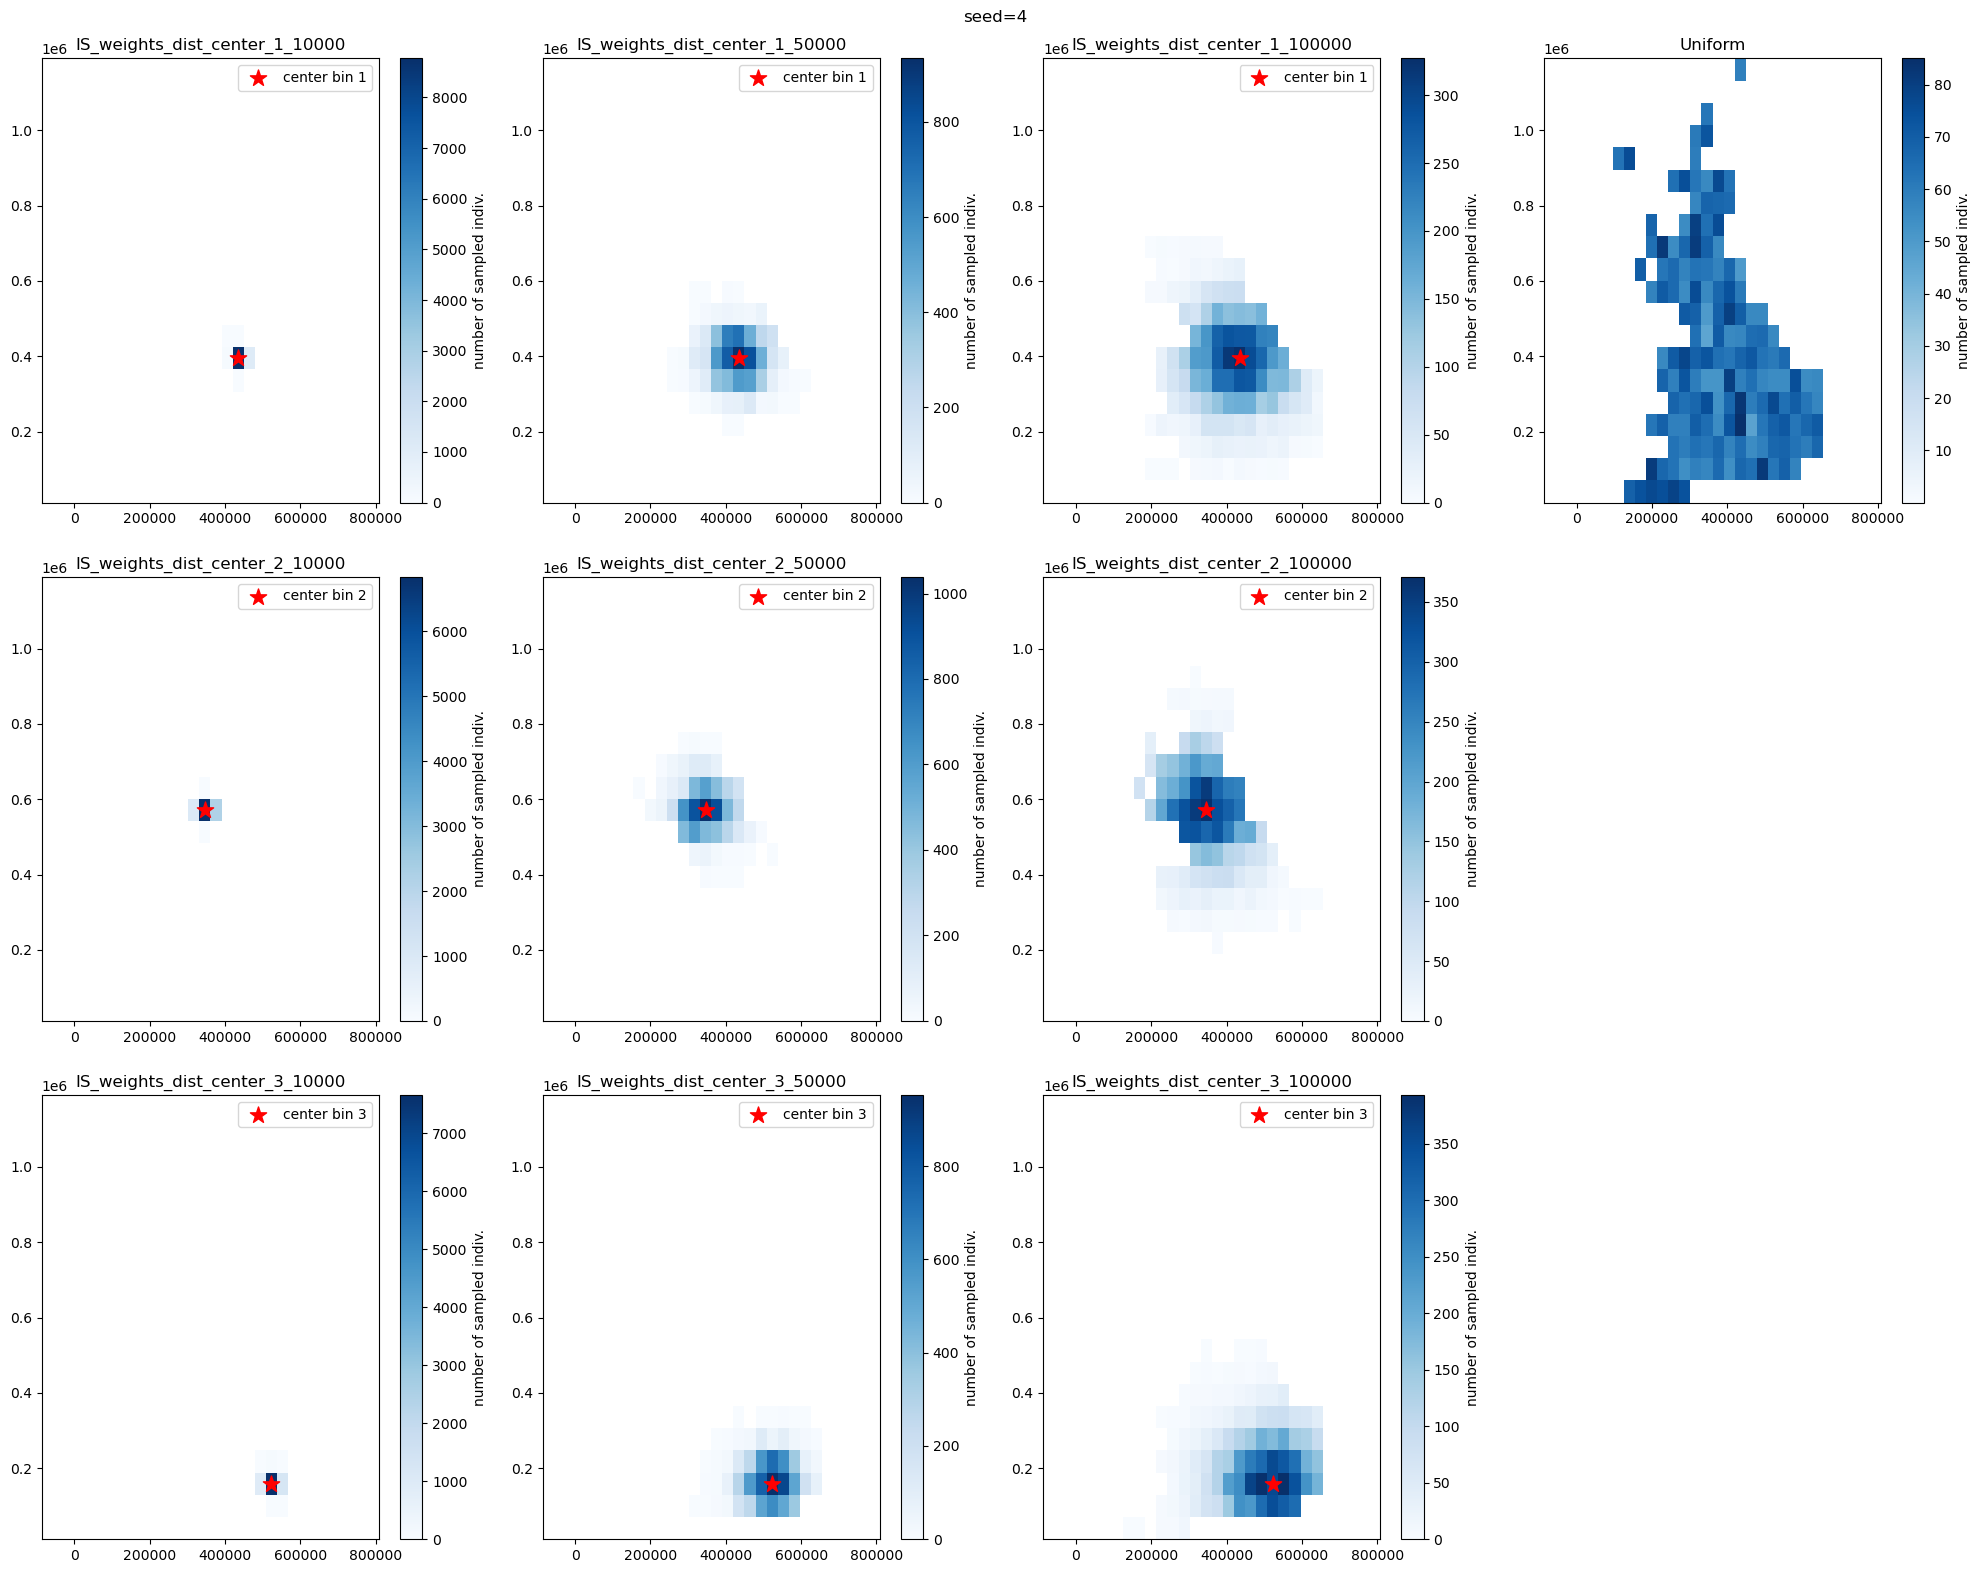

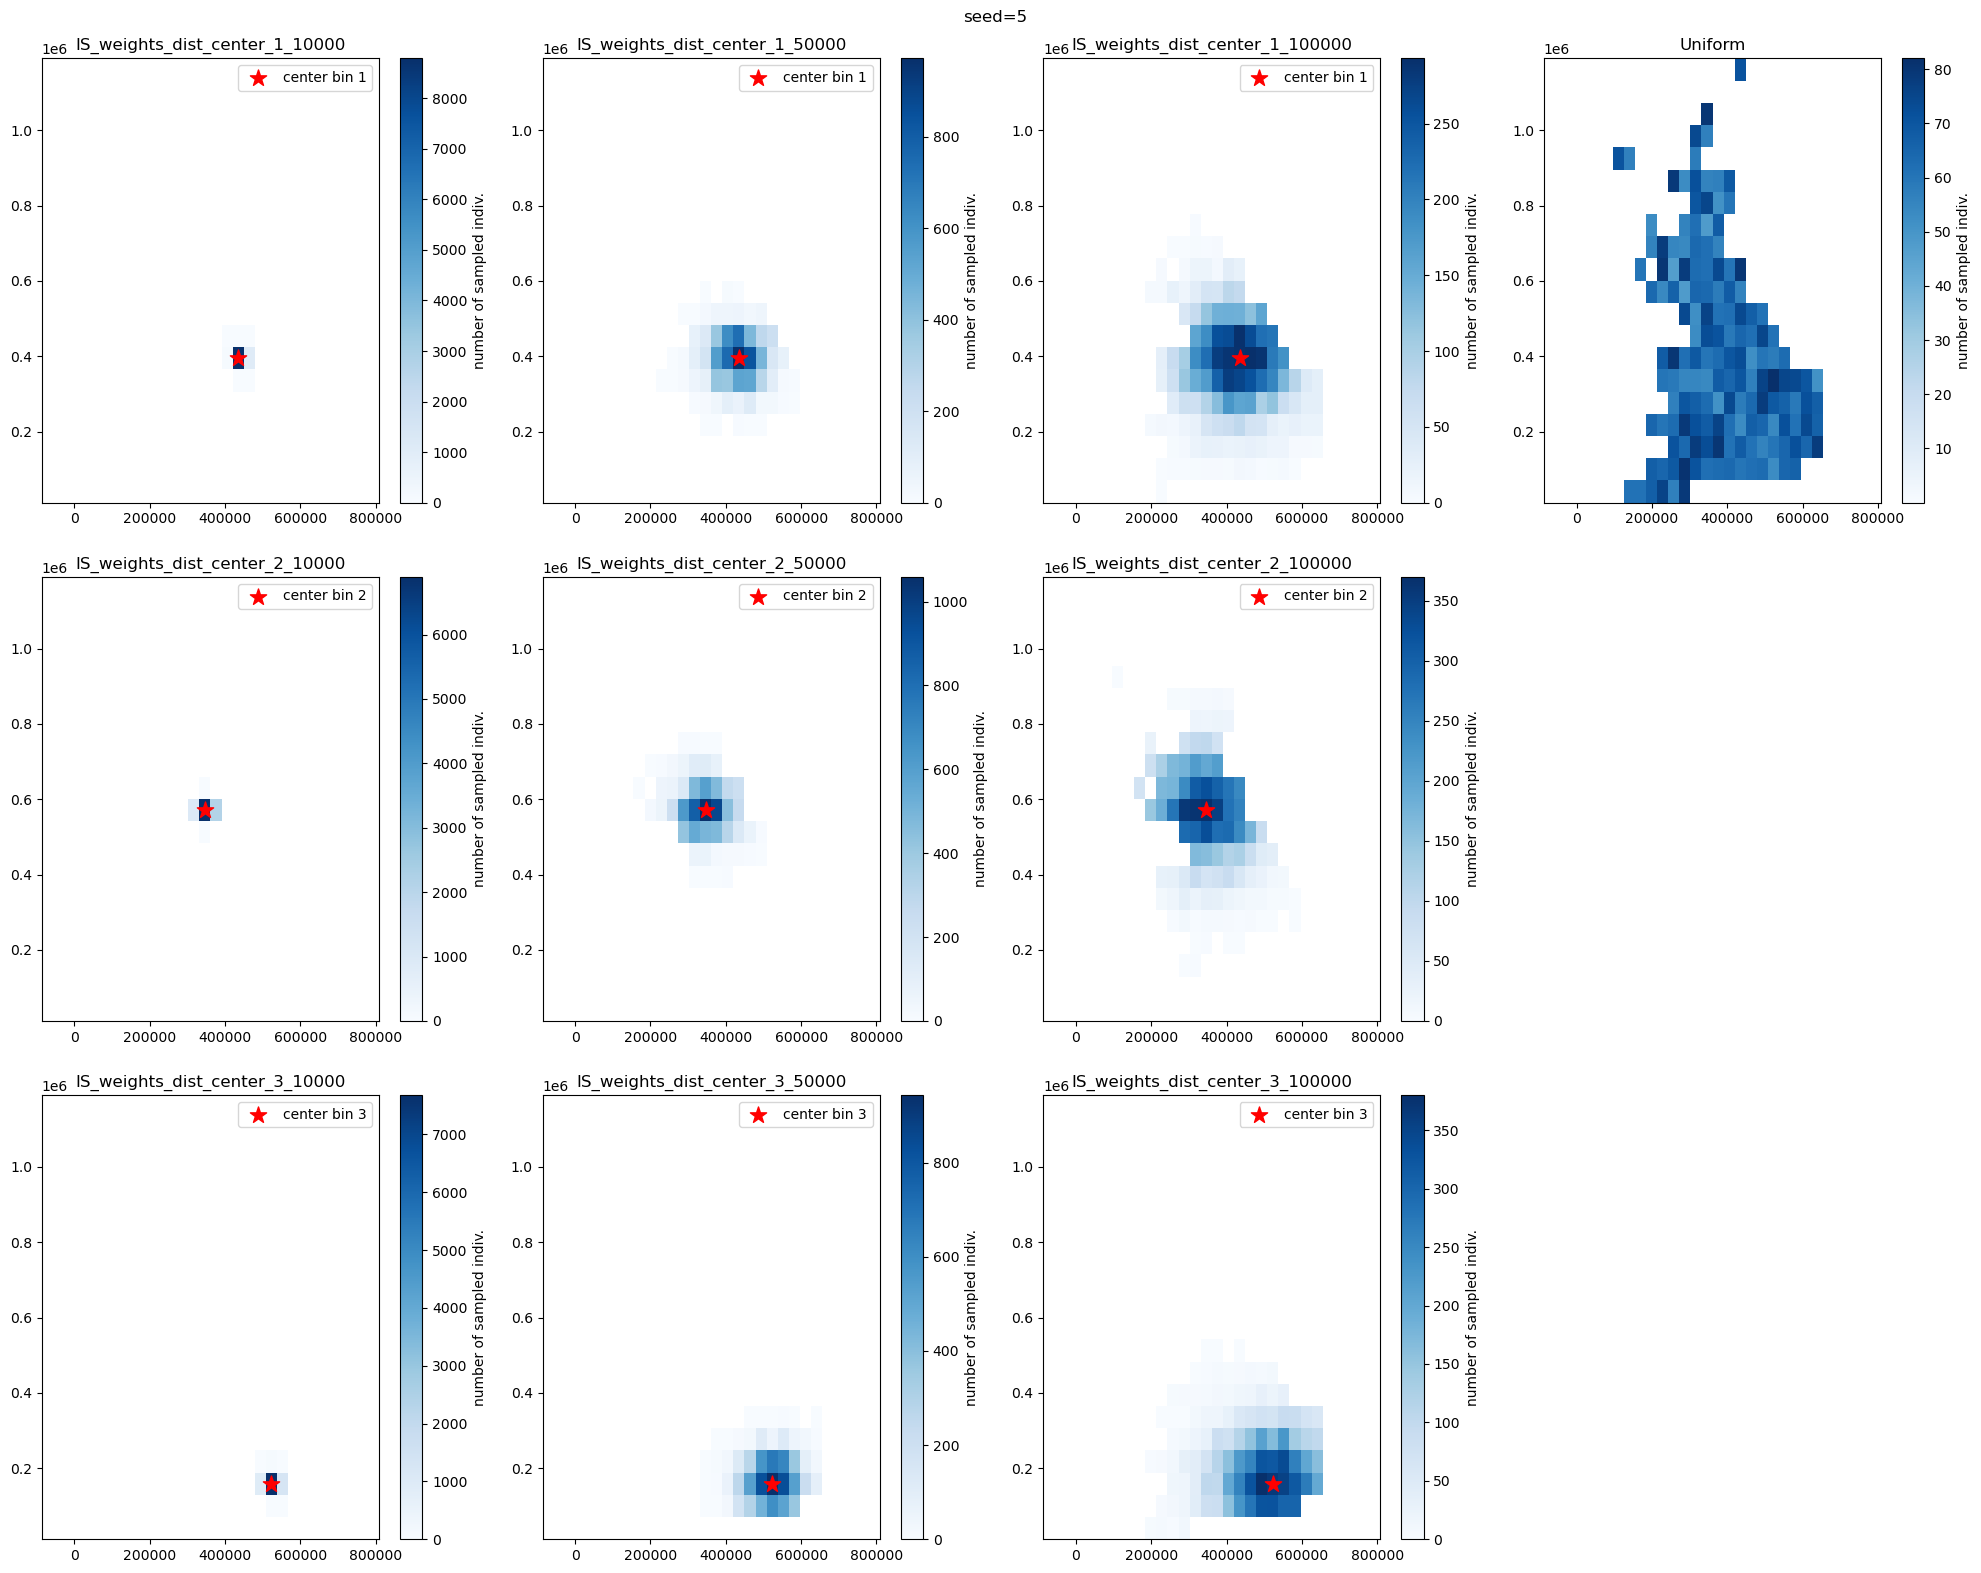

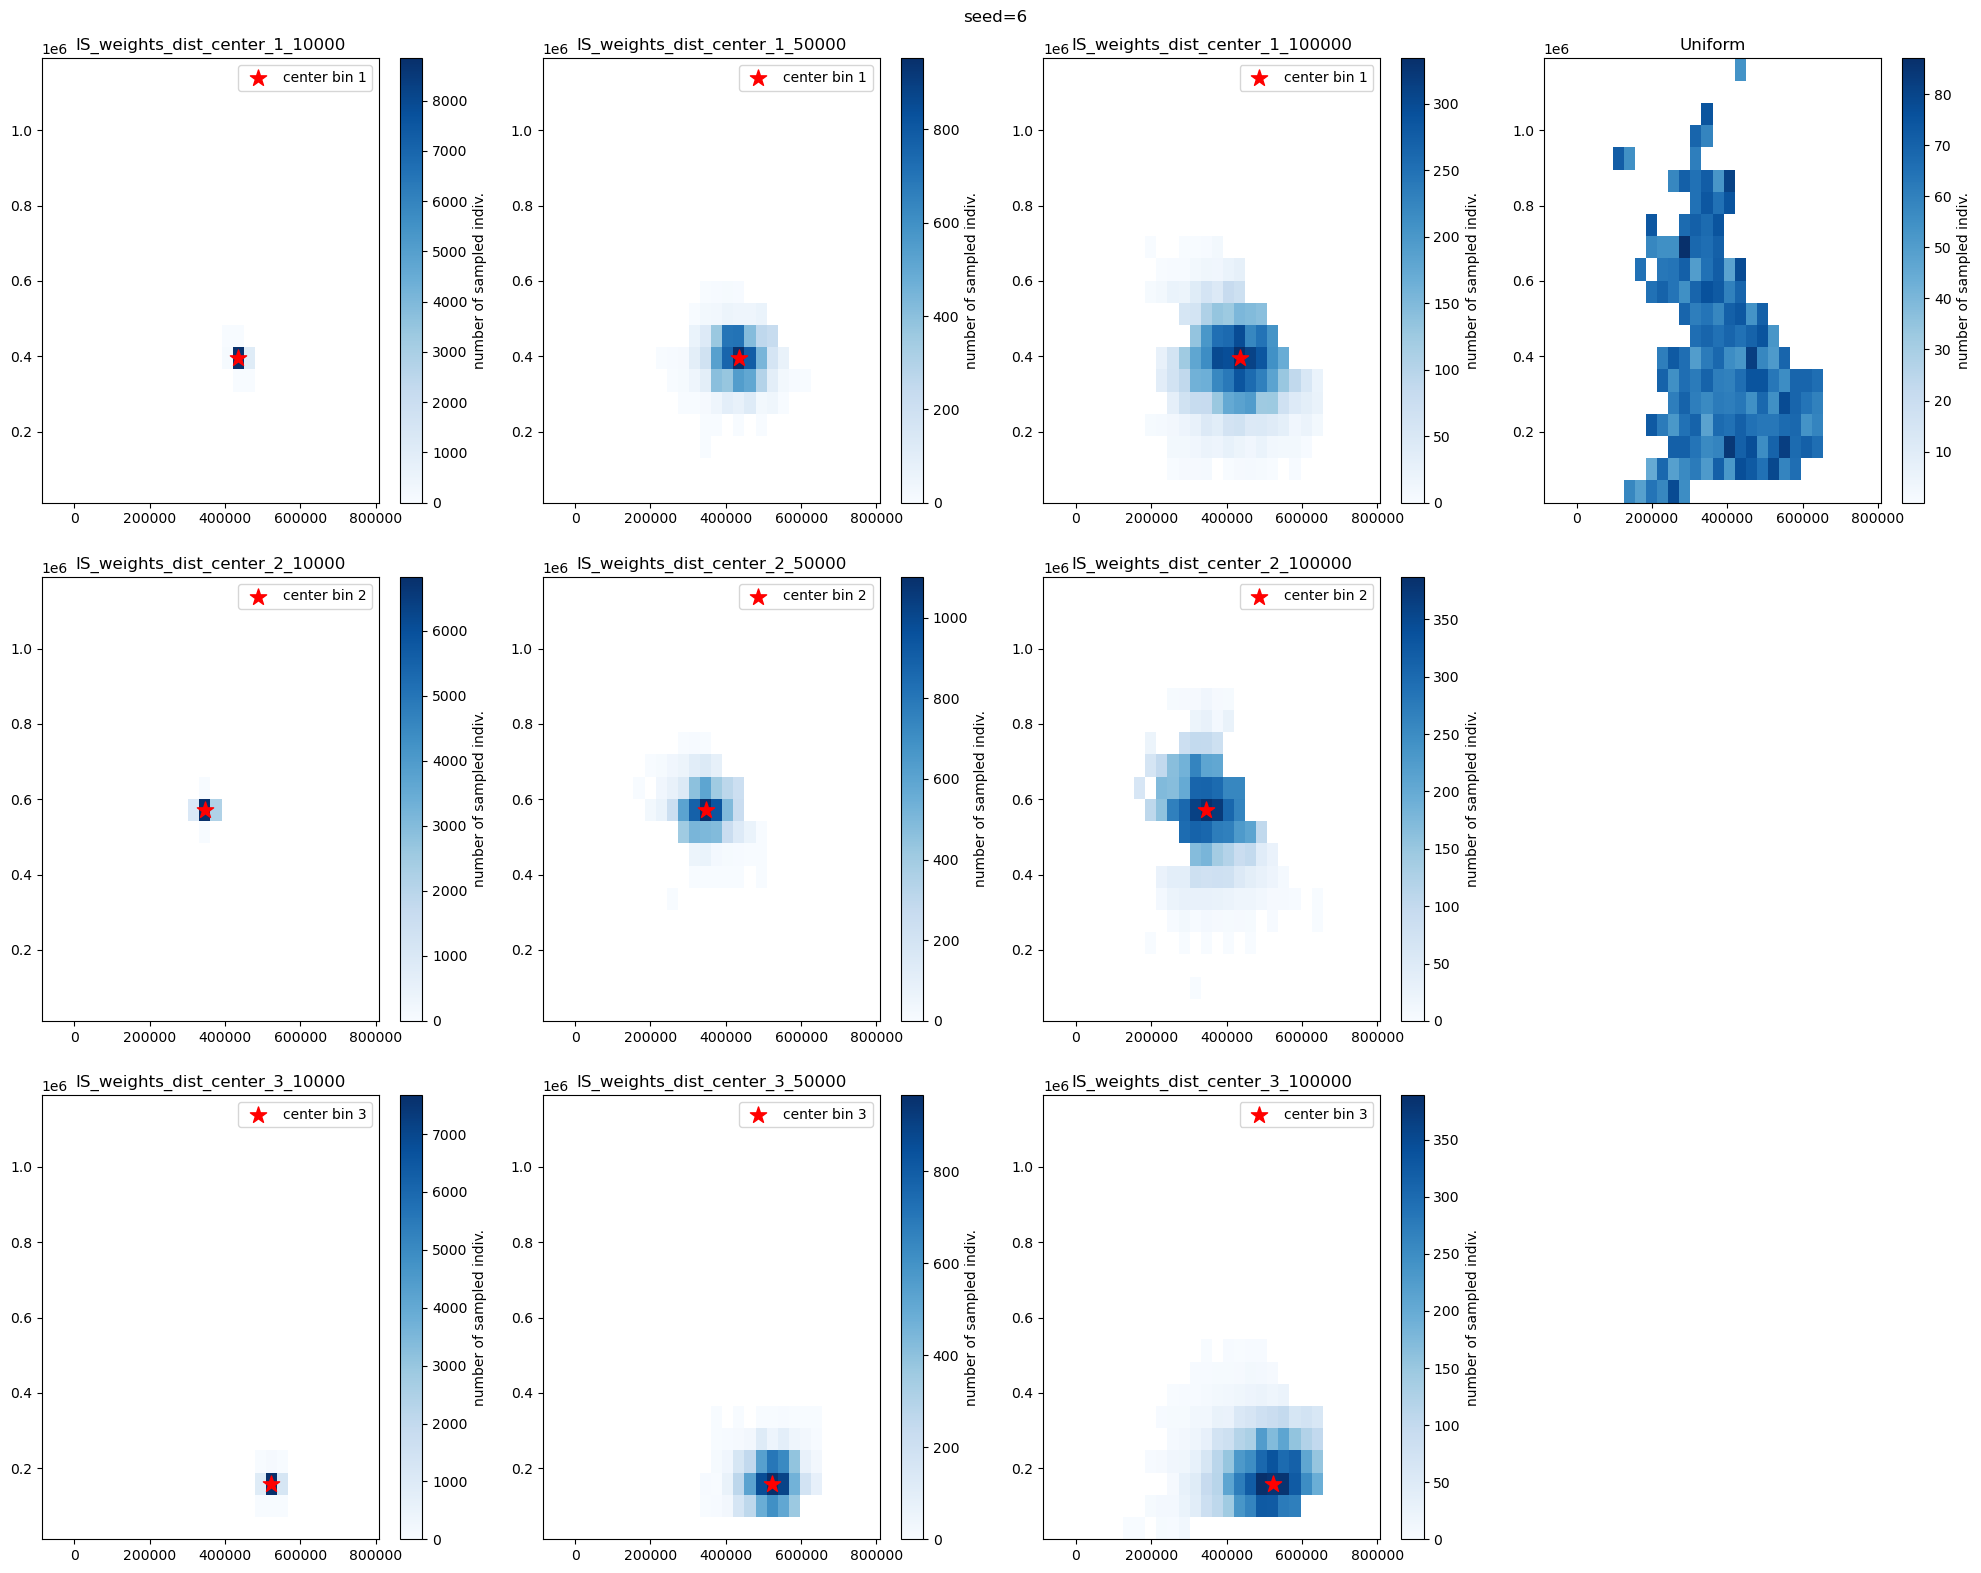

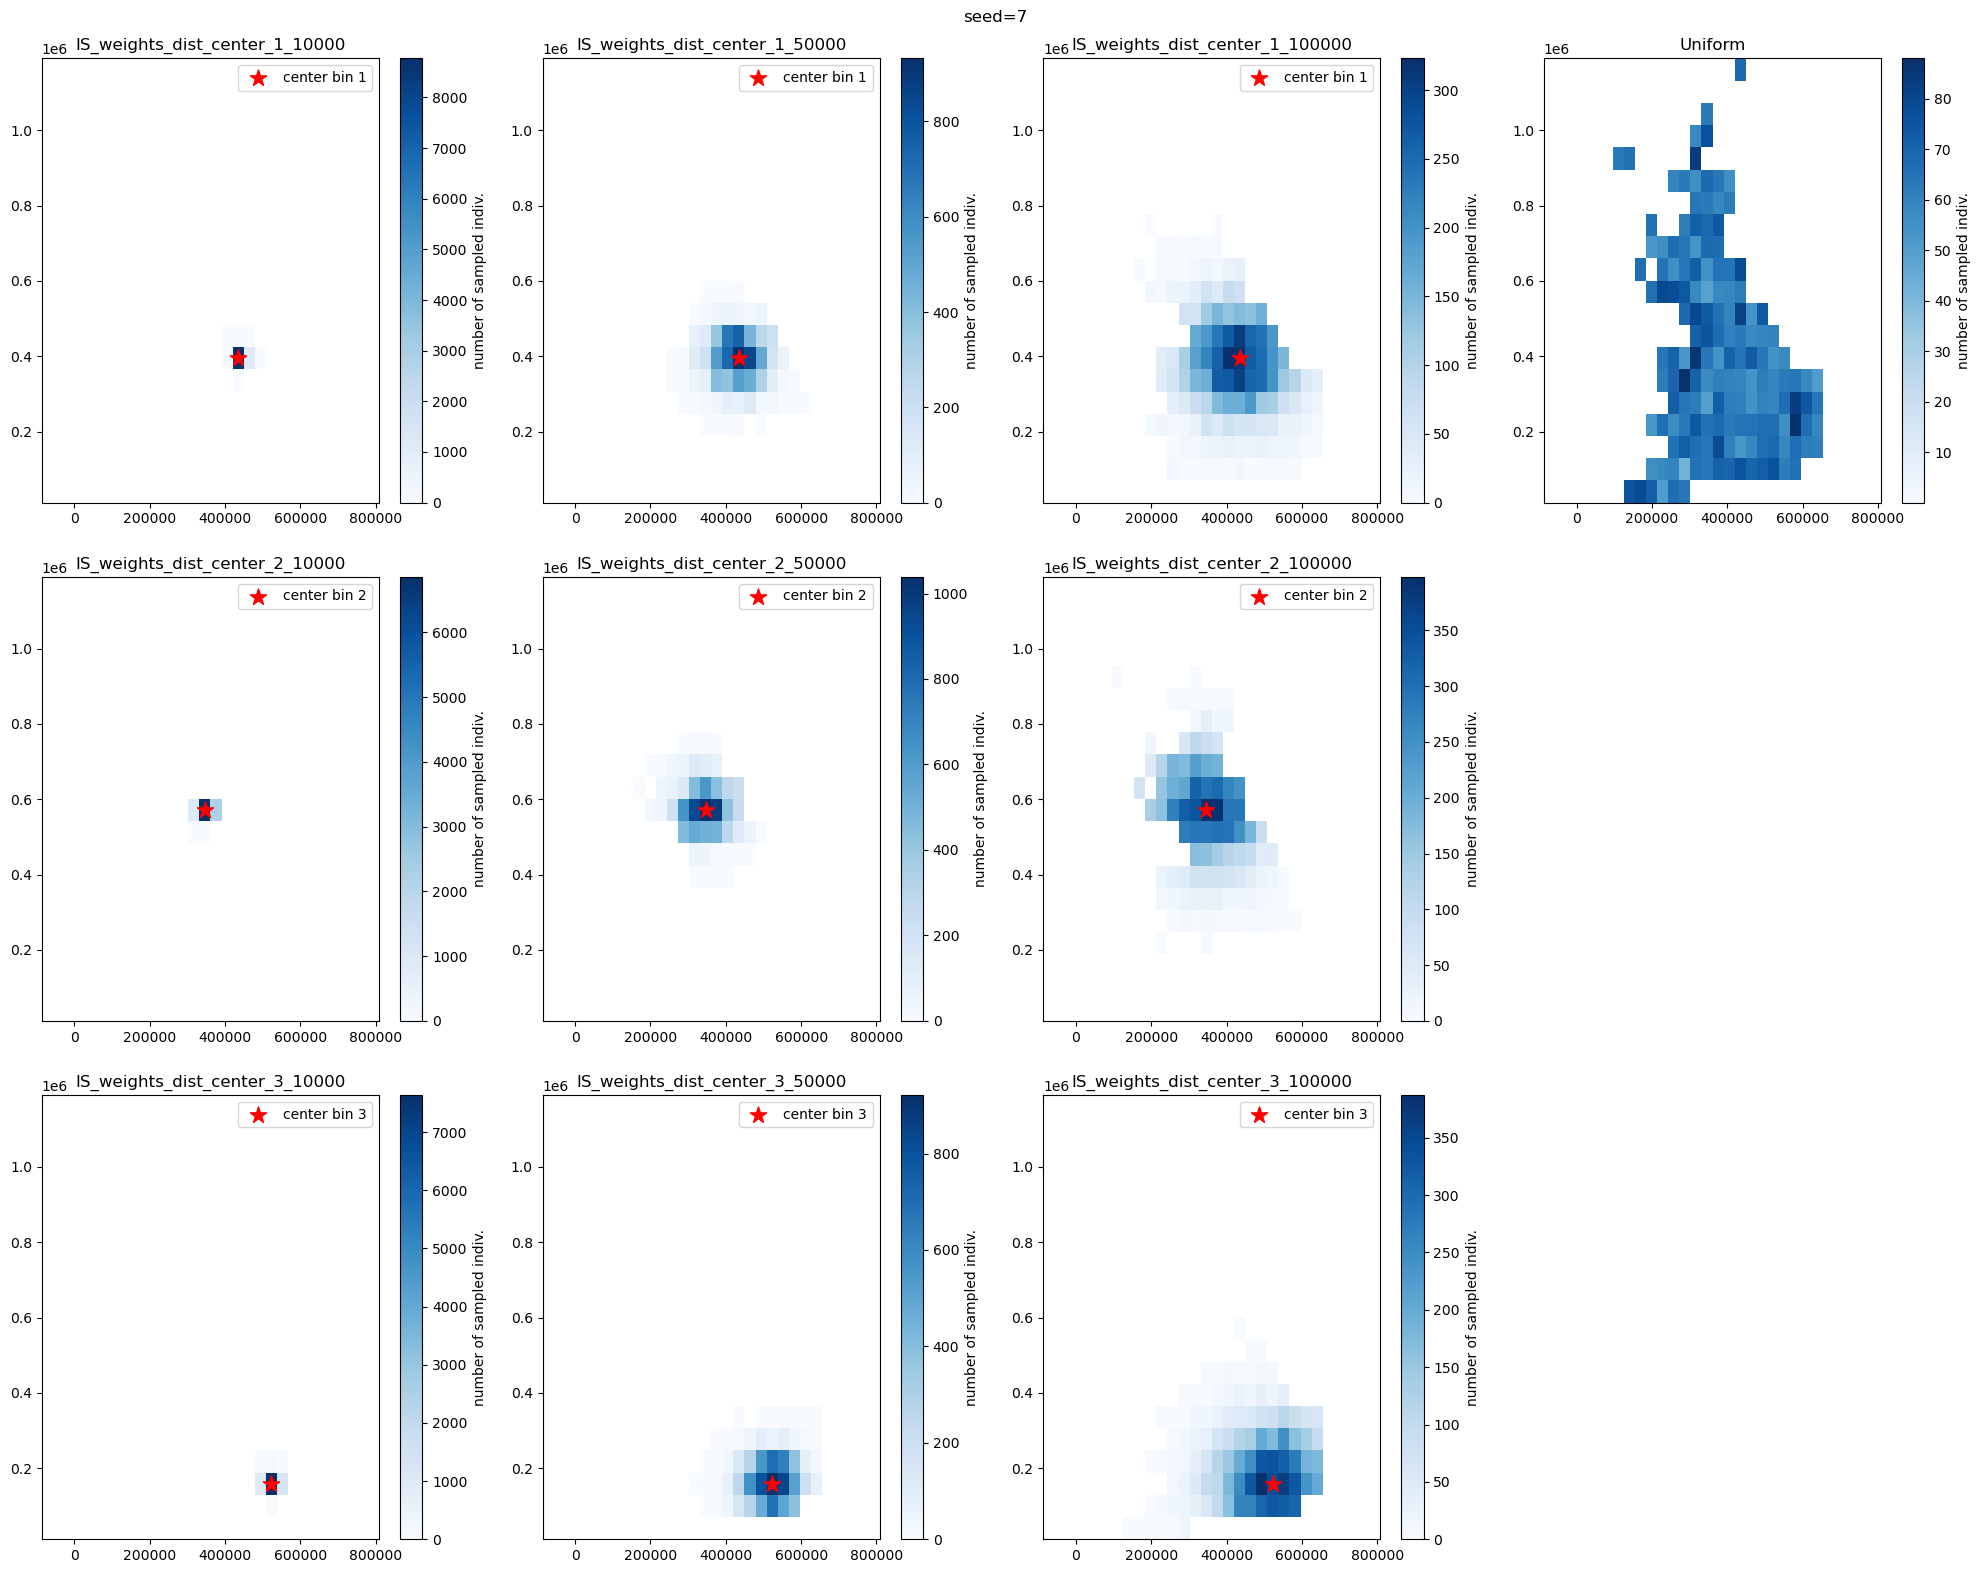

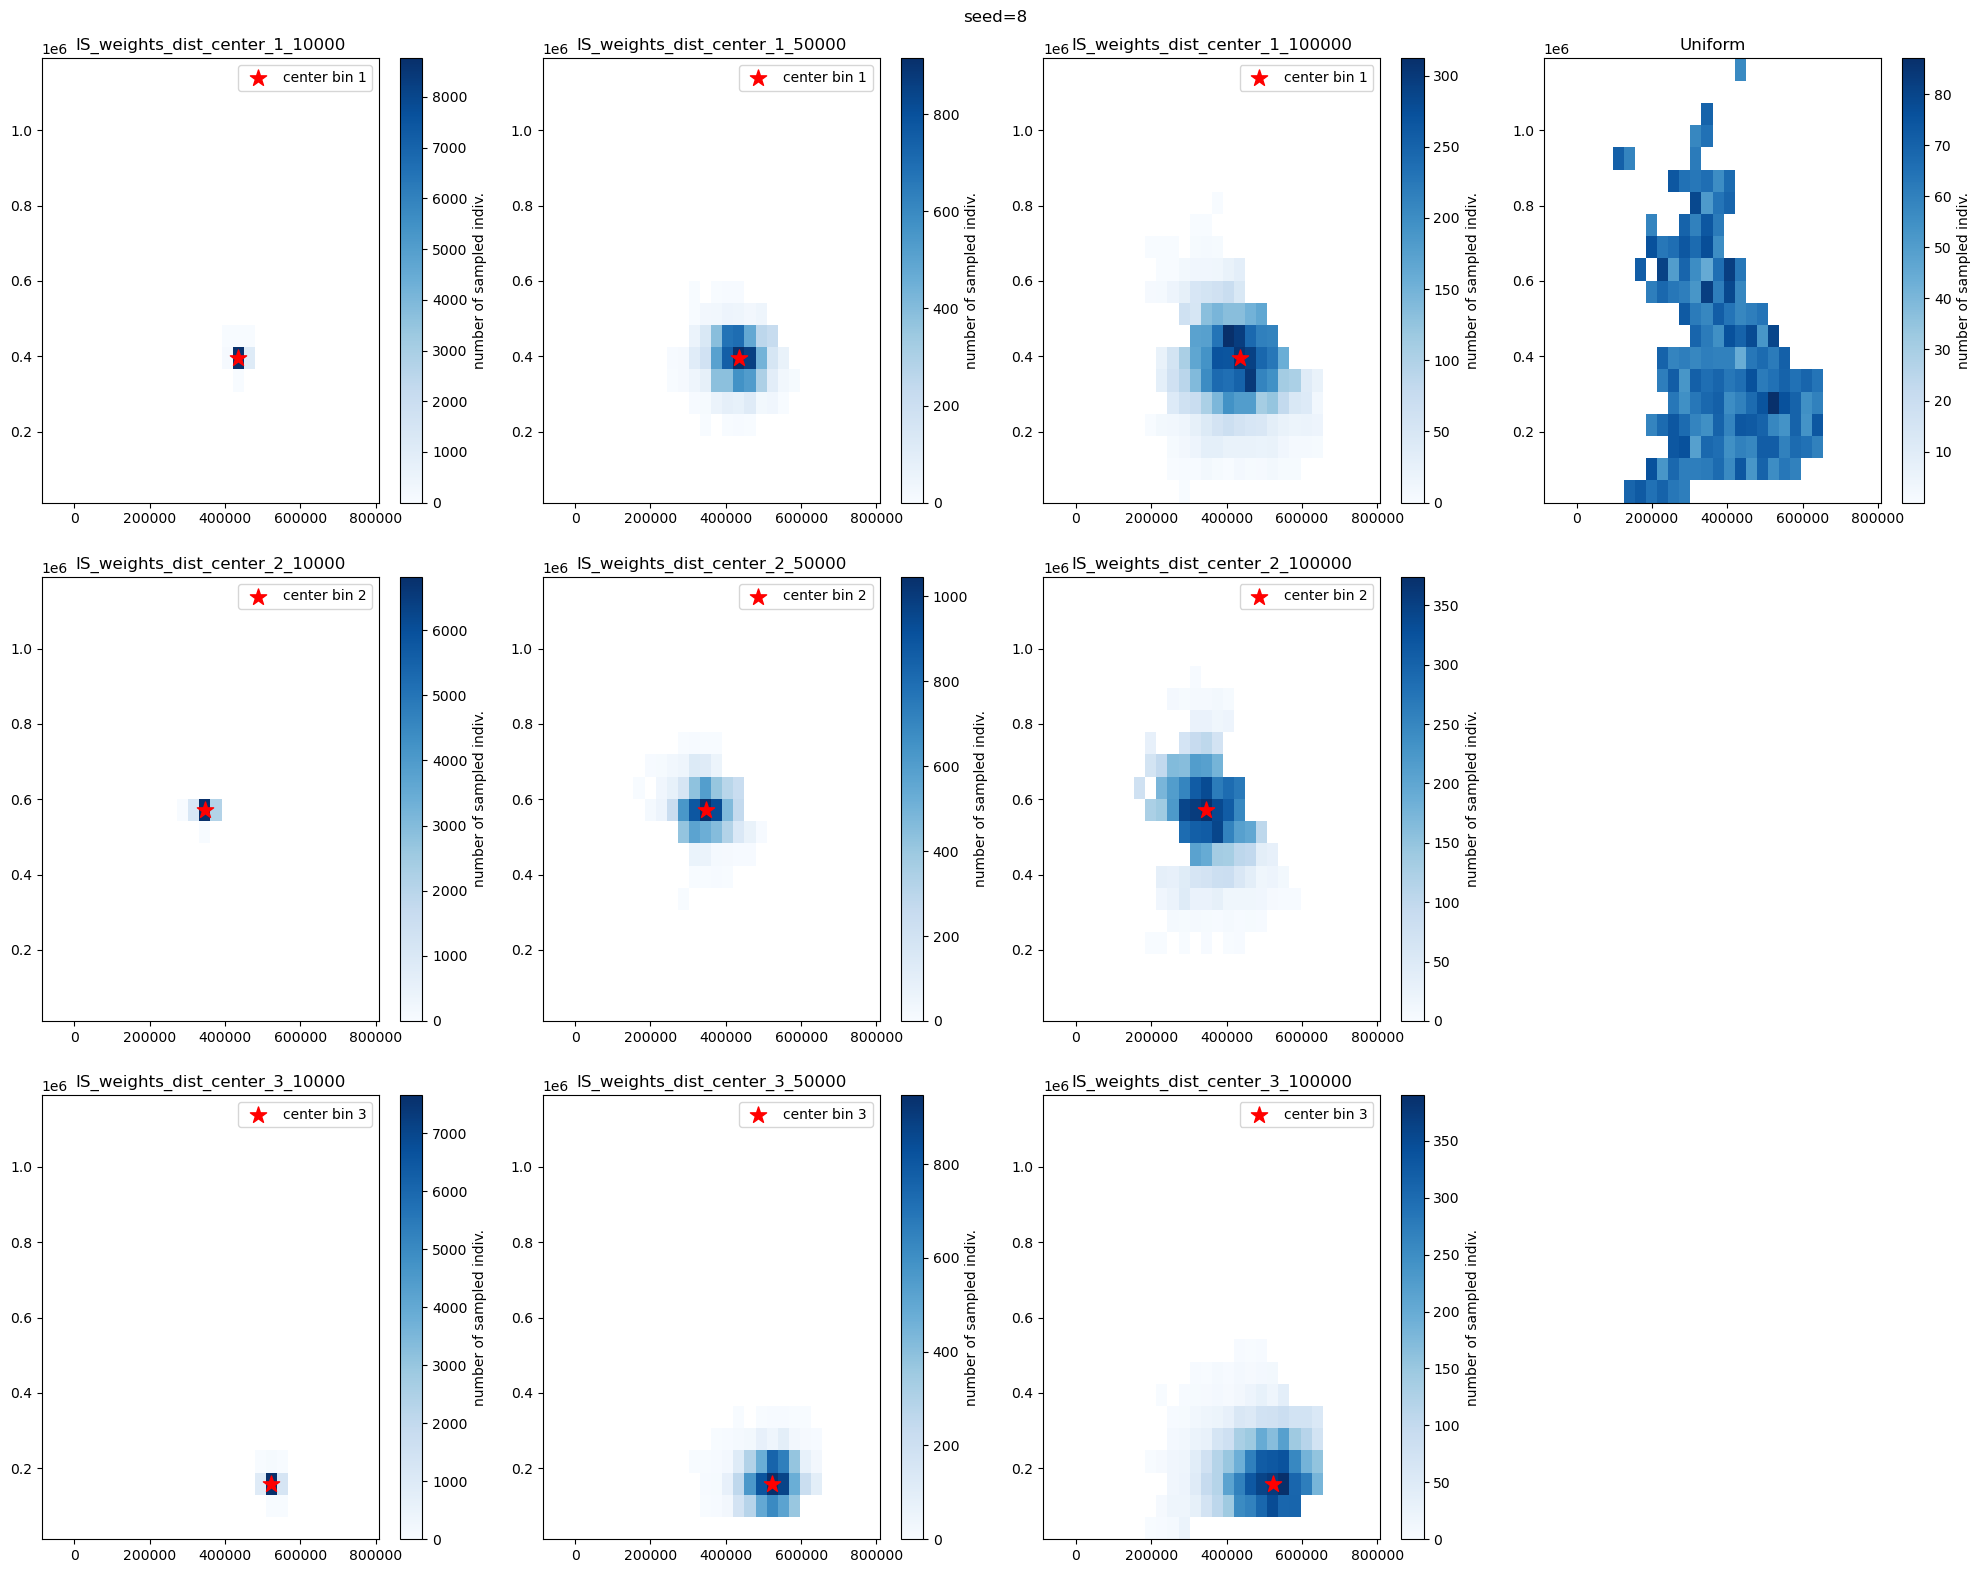

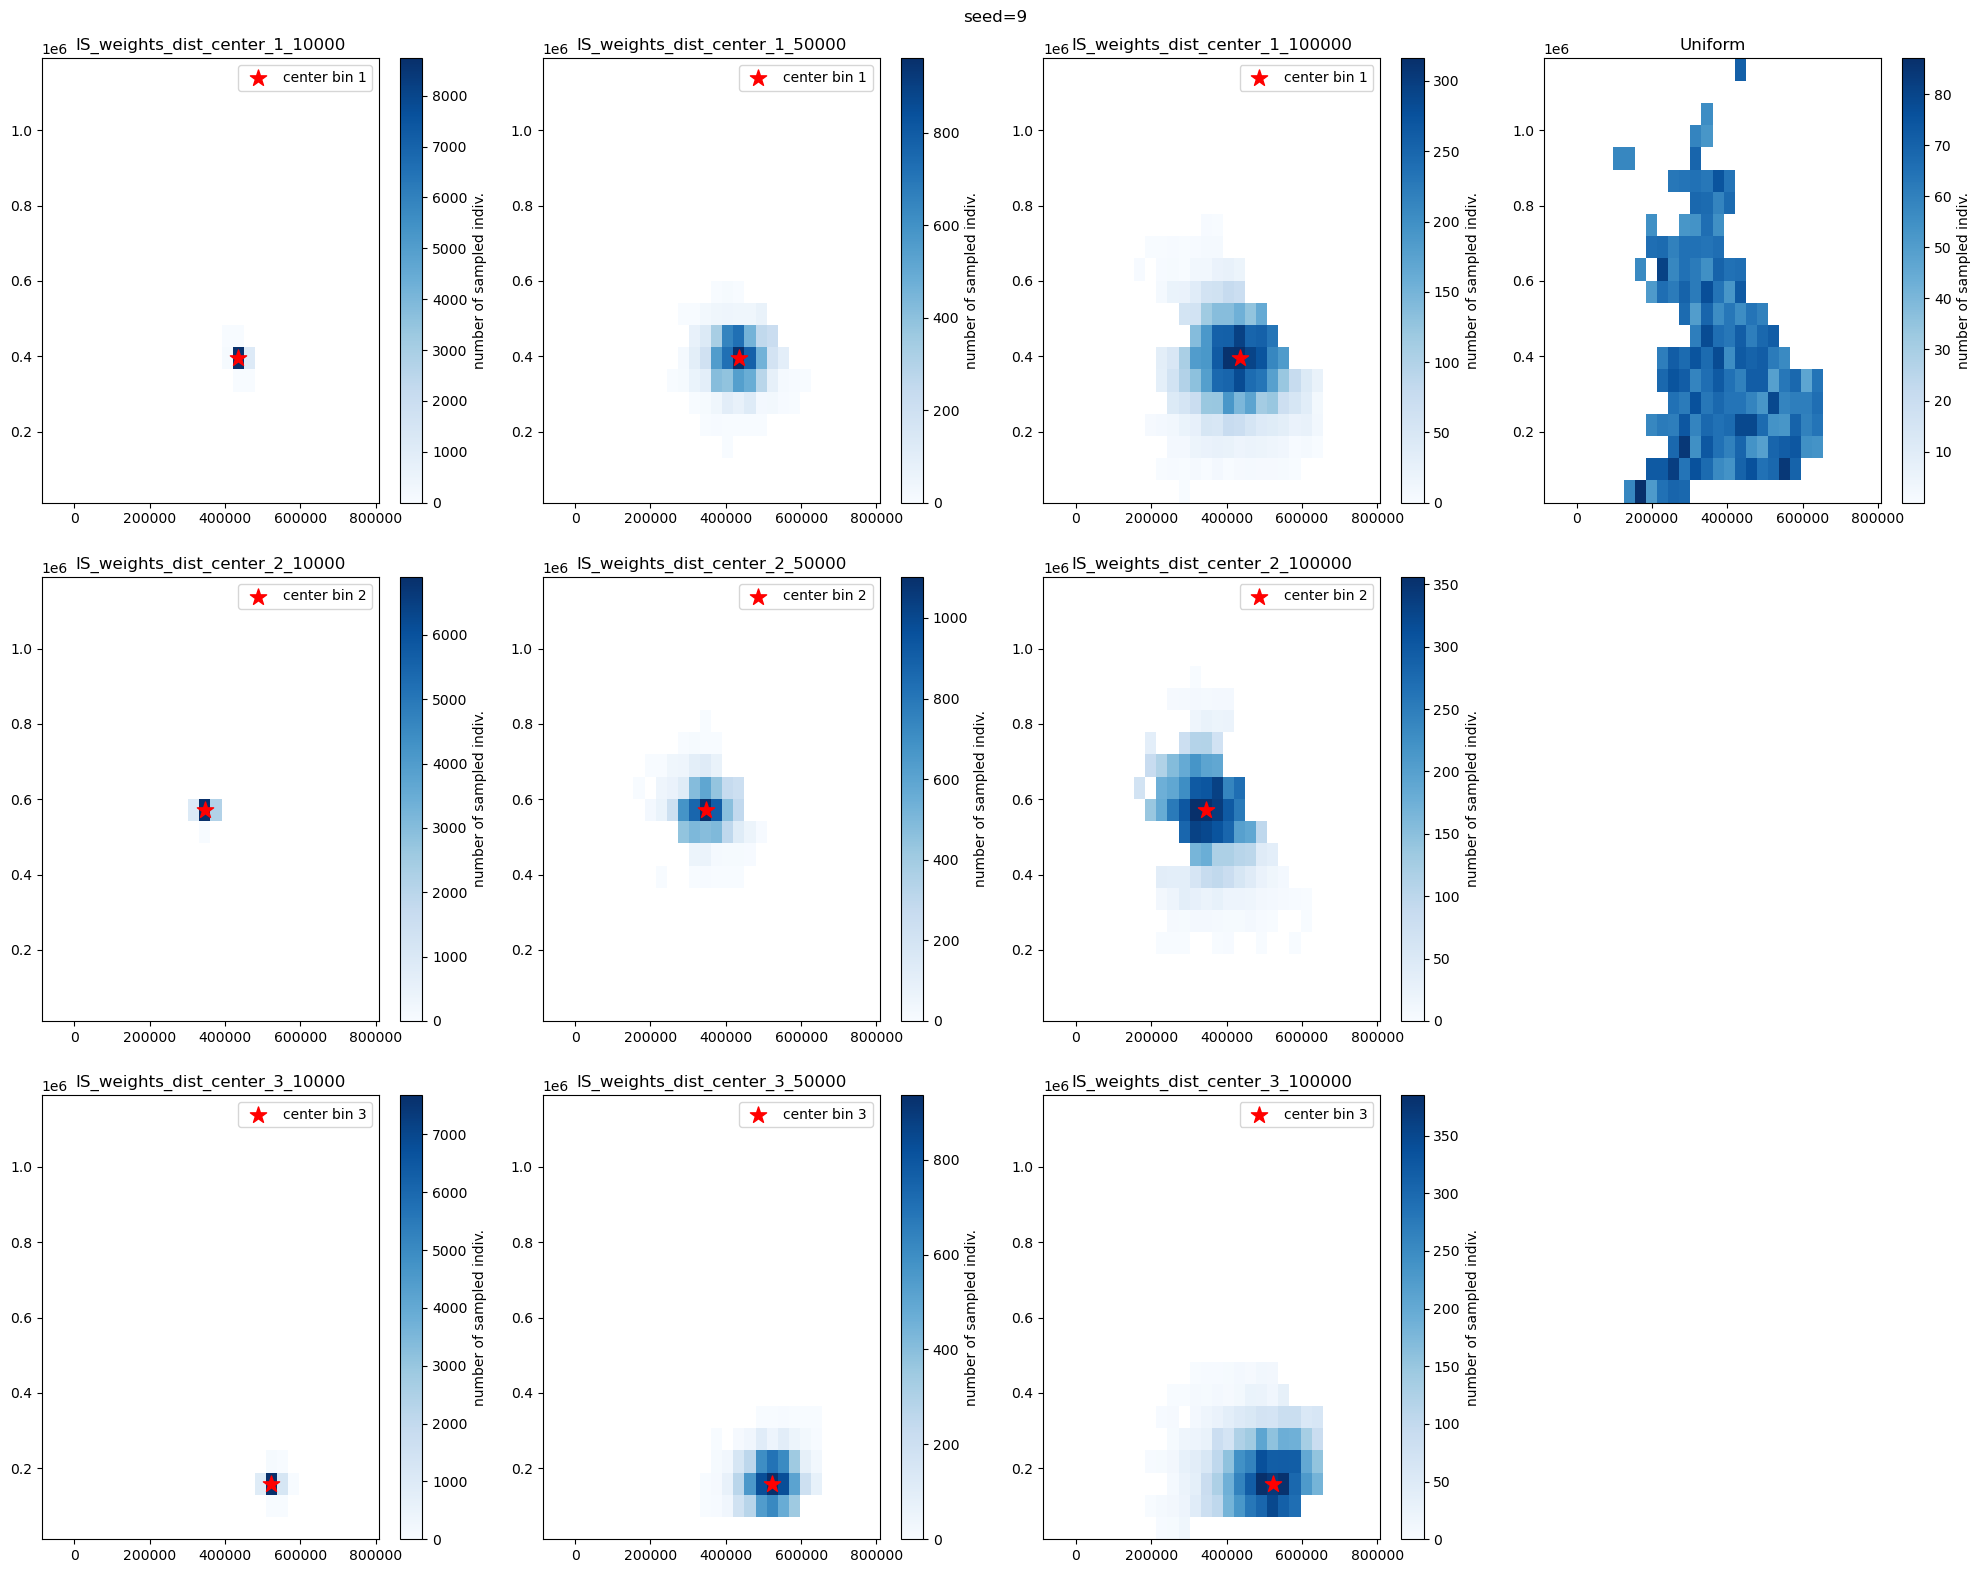

In [141]:
seeds = np.arange(10)
cmap = plt.get_cmap('Blues')
cmap.set_under('white')

for s in seeds:
    fig,ax=plt.subplots(3,4,figsize=(20,16))
    plt.suptitle(f'seed={s}')
    samp_unif = df_geo_filt.sample(n=n,replace=True,weights='IS_weights_unif',random_state=s)
    hist_unif = ax[0,3].hist2d(samp_unif['birth_east_coord'], samp_unif['birth_north_coord'], bins=[xedges, yedges], cmap=cmap,vmin=1e-8)
    ax[0,3].axis('equal')
    ax[0,3].set_title('Uniform')
    cbar = fig.colorbar(hist_unif[3], ax=ax[0,3], orientation='vertical',label='number of sampled indiv.')
    for i,c in enumerate(centers):
        
        for j,w in enumerate(w_list):
            weight_col = f'IS_weights_{c}_{w}'
            samp_temp = df_geo_filt.sample(n=n,replace=True,weights=weight_col,random_state=s)
            hist_temp = ax[i,j].hist2d(samp_temp['birth_east_coord'], samp_temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap,vmin=1e-8)
            ax[i,j].axis('equal')
            ax[i,j].set_title(weight_col)
            cbar = fig.colorbar(hist_temp[3], ax=ax[i, j], orientation='vertical',label='number of sampled indiv.')

            if c=='dist_center_1':
                ax[i,j].scatter(center_coord_1[0],center_coord_1[1],s=150,marker="*",c='r',label='center bin 1')
            if c=='dist_center_2':
                ax[i,j].scatter(center_coord_2[0],center_coord_2[1],s=150,marker="*",c='r',label='center bin 2')
            if c=='dist_center_3':
                ax[i,j].scatter(center_coord_3[0],center_coord_3[1],s=150,marker="*",c='r',label='center bin 3')
            ax[i,j].legend()

    ax[1,3].axis('off')
    ax[2,3].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'test_plot_seed{s}.png')
    plt.show()